In [3]:
import os, sys
import pickle
import pandas as pd
import numpy as np

#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb, pleth_spi

# creating histogram
print("created a new group histogram\n")
group_hist_ppga = pleth_spi.Histogram(0, 20, 1000)
group_hist_hbi = pleth_spi.Histogram(240, 2000, 1000)

non_list = []
vital_path = 'PACU_vital/PACU1_4-6'
vital_list = os.listdir(vital_path)

srate, cnt = 100, 0
# 추가 샘플을 group histo 에 집어넣음
for f_vital in vital_list:
    cnt += 1
    cachepath = "cache/PPG/hbi_ppga_" + f_vital
    
    #이미 저장된 pickle 파일이 있으면 loading -> group histogram을 훈련시킴
    if os.path.exists(cachepath):
        print('loading sample '+f_vital)
        #hbi_list, ppga_list = pickle.load(open(cachepath, 'rb'))
        
        #for hbi in hbi_list:
            #group_hist_hbi.learn(hbi)
        #for ppga in ppga_list:
        #    group_hist_ppga.learn(ppga)
            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        print('({}/{}) '.format(cnt, len(vital_list)), end='')
        if not '.vital' in f_vital:
            print('not a vital file')
            non_list.append(f_vital)
            continue
        
        
        vals = vitaldb.vital_recs(vital_path+'/'+f_vital, ['SNUADCW/PLETH'], interval = 0.01).flatten()
        if len(vals) == 1:
            print('no data')
            non_list.append(f_vital)
            continue

        print('size of', f_vital, ':', len(vals))
        print('detecting peak...', end='')
        vals = arr.exclude_undefined(vals)
        
        # vals 값이 일정한 경우
        if len(np.unique(vals)) == 1:
            print('no valid data')
            non_list.append(f_vital)
            continue
        
        minlist, maxlist = arr.detect_peaks(vals, 100)
        print('completed...')
        
        hbi_list, ppga_list = [], []
        for j in range(len(maxlist) - 1):
            hbi = (maxlist[j+1] - maxlist[j]) / srate * 1000
            if 240 < hbi < 2000:
                #group_hist_hbi.learn(hbi)
                hbi_list.append(hbi)
            ppga = vals[maxlist[j+1]] - vals[minlist[j]]
            if 0 < ppga < 100:
                #group_hist_ppga.learn(ppga)
                ppga_list.append(ppga)    
                
        pickle.dump((hbi_list, ppga_list), open(cachepath, 'wb'))

created a new group histogram

loading sample PACU1_5_201016_140334.vital
loading sample PACU1_4_200723_113427.vital
loading sample PACU1_5_201028_195109.vital
loading sample PACU1_5_200817_135429.vital
(5/1453) size of PACU1_5_200129_095120.vital : 253496
detecting peak...completed...
loading sample PACU1_4_190503_231520.vital
loading sample PACU1_4_200107_114731.vital
loading sample PACU1_4_190820_150626.vital
loading sample PACU1_5_200707_184709.vital
loading sample PACU1_4_190611_103344.vital
loading sample PACU1_4_200326_174721.vital
loading sample PACU1_4_190828_204335.vital
(13/1453) size of PACU1_4_200214_161101.vital : 192516
detecting peak...completed...
loading sample PACU1_4_190820_112553.vital
loading sample PACU1_5_201027_151403.vital
loading sample PACU1_5_200320_084936.vital
loading sample PACU1_6_200625_163959.vital
loading sample PACU1_6_200911_144552.vital
loading sample PACU1_4_200302_092952.vital
loading sample PACU1_4_200629_171101.vital
loading sample PACU1_4_201

detecting peak...completed...
(182/1453) size of PACU1_4_200128_152516.vital : 284544
detecting peak...completed...
loading sample PACU1_4_190903_104345.vital
(184/1453) size of PACU1_6_200221_114317.vital : 278679
detecting peak...completed...
loading sample PACU1_4_200519_221914.vital
loading sample PACU1_6_200915_112132.vital
(187/1453) size of PACU1_6_200221_170326.vital : 290925
detecting peak...completed...
loading sample PACU1_4_190527_165508.vital
loading sample PACU1_4_200113_095153.vital
loading sample PACU1_4_200728_001949.vital
(191/1453) size of PACU1_6_200129_092739.vital : 248172
detecting peak...completed...
(192/1453) size of PACU1_5_200221_172749.vital : 217438
detecting peak...completed...
loading sample PACU1_6_191114_153821.vital
loading sample PACU1_6_200715_155532.vital
loading sample PACU1_4_200304_185940.vital
loading sample PACU1_4_200619_030659.vital
loading sample PACU1_4_200325_182708.vital
loading sample PACU1_5_200121_191449.vital
loading sample PACU1_6_2

detecting peak...completed...
loading sample PACU1_6_200609_115147.vital
loading sample PACU1_4_190523_210745.vital
loading sample PACU1_4_190830_143332.vital
loading sample PACU1_5_200302_200759.vital
loading sample PACU1_6_200318_143824.vital
loading sample PACU1_4_201009_015731.vital
loading sample PACU1_5_200330_134400.vital
loading sample PACU1_6_200813_102207.vital
loading sample PACU1_5_190906_145141.vital
(385/1453) size of PACU1_4_200203_103851.vital : 206798
detecting peak...completed...
loading sample PACU1_4_190828_134015.vital
loading sample PACU1_4_200917_094722.vital
loading sample PACU1_5_200624_174812.vital
loading sample PACU1_6_191119_155717.vital
loading sample PACU1_5_200625_135857.vital
loading sample PACU1_6_190703_121905.vital
loading sample PACU1_5_190430_090255.vital
(393/1453) size of PACU1_5_200123_082807.vital : 248562
detecting peak...completed...
loading sample PACU1_4_200521_204742.vital
loading sample PACU1_6_190917_114145.vital
loading sample PACU1_4_1

detecting peak...completed...
loading sample PACU1_6_200902_103630.vital
(554/1453) size of PACU1_6_200217_090742.vital : 245994
detecting peak...completed...
loading sample PACU1_6_201008_103600.vital
loading sample PACU1_4_200515_085634.vital
loading sample PACU1_6_200805_115740.vital
loading sample PACU1_4_190607_114710.vital
(559/1453) size of PACU1_6_200131_165108.vital : 251217
detecting peak...completed...
loading sample PACU1_4_190709_220323.vital
loading sample PACU1_5_200302_164307.vital
loading sample PACU1_4_200110_214717.vital
loading sample PACU1_5_190816_173556.vital
loading sample PACU1_5_190816_182521.vital
loading sample PACU1_5_200304_160632.vital
loading sample PACU1_6_200612_084244.vital
loading sample PACU1_5_190723_160030.vital
loading sample PACU1_4_200312_204007.vital
(569/1453) size of PACU1_4_200123_141712.vital : 334344
detecting peak...completed...
(570/1453) size of PACU1_5_200204_181405.vital : 287013
detecting peak...completed...
loading sample PACU1_4_2

(738/1453) size of PACU1_5_200220_102723.vital : 388585
detecting peak...completed...
loading sample PACU1_5_200513_183008.vital
loading sample PACU1_6_200818_183733.vital
loading sample PACU1_4_200117_110719.vital
loading sample PACU1_5_190617_114637.vital
loading sample PACU1_5_190513_084542.vital
loading sample PACU1_5_190829_100712.vital
loading sample PACU1_6_190704_155953.vital
loading sample PACU1_6_200331_132612.vital
loading sample PACU1_5_200820_174403.vital
loading sample PACU1_6_190530_125830.vital
loading sample PACU1_5_190916_162900.vital
loading sample PACU1_4_200823_011008.vital
loading sample PACU1_4_200120_124004.vital
loading sample PACU1_5_190906_083816.vital
loading sample PACU1_4_200302_162641.vital
loading sample PACU1_6_200228_084050.vital
loading sample PACU1_4_190816_190008.vital
loading sample PACU1_5_190718_090028.vital
loading sample PACU1_5_201020_163941.vital
loading sample PACU1_4_200922_095009.vital
loading sample PACU1_5_200615_151715.vital
loading sam

detecting peak...completed...
loading sample PACU1_5_201021_135738.vital
loading sample PACU1_6_200612_093033.vital
loading sample PACU1_4_200916_200956.vital
loading sample PACU1_6_200302_100145.vital
loading sample PACU1_6_200511_095341.vital
loading sample PACU1_6_200731_083655.vital
loading sample PACU1_4_200609_163706.vital
loading sample PACU1_5_200819_183250.vital
loading sample PACU1_4_200507_084822.vital
loading sample PACU1_4_190507_171358.vital
loading sample PACU1_5_190816_151949.vital
loading sample PACU1_5_190531_144225.vital
loading sample PACU1_4_190712_183847.vital
loading sample PACU1_4_200716_164029.vital
loading sample PACU1_4_200303_094308.vital
loading sample PACU1_5_190517_152448.vital
loading sample PACU1_4_200929_102240.vital
loading sample PACU1_6_190821_155954.vital
loading sample PACU1_6_190712_155258.vital
loading sample PACU1_5_201022_102913.vital
loading sample PACU1_4_201006_184916.vital
loading sample PACU1_5_201030_093721.vital
loading sample PACU1_5_2

detecting peak...completed...
loading sample PACU1_5_200526_160104.vital
(1095/1453) size of PACU1_4_200222_211257.vital : 233668
detecting peak...completed...
loading sample PACU1_6_190612_124844.vital
loading sample PACU1_4_200728_103723.vital
loading sample PACU1_4_200717_114619.vital
loading sample PACU1_5_190531_165639.vital
loading sample PACU1_6_201021_142848.vital
loading sample PACU1_6_190710_214345.vital
loading sample PACU1_5_200303_130223.vital
loading sample PACU1_5_201014_092217.vital
loading sample PACU1_5_190716_125505.vital
loading sample PACU1_4_190531_115124.vital
loading sample PACU1_6_200508_154519.vital
loading sample PACU1_6_190430_123508.vital
loading sample PACU1_6_201014_103929.vital
loading sample PACU1_4_190517_090015.vital
loading sample PACU1_4_190821_094059.vital
loading sample PACU1_5_200520_101422.vital
loading sample PACU1_4_200715_121701.vital
loading sample PACU1_6_200811_171320.vital
loading sample PACU1_5_200603_183444.vital
loading sample PACU1_5_

detecting peak...completed...
loading sample PACU1_5_200121_131155.vital
(1440/1453) size of PACU1_6_200225_140000.vital : 528529
detecting peak...completed...
loading sample PACU1_4_201019_163758.vital
loading sample PACU1_5_190820_084958.vital
loading sample PACU1_6_200507_161903.vital
loading sample PACU1_5_200109_200741.vital
loading sample PACU1_5_200708_095633.vital
loading sample PACU1_6_190723_181853.vital
loading sample PACU1_5_190530_202626.vital
(1448/1453) size of PACU1_6_200204_135816.vital : 258699
detecting peak...completed...
loading sample PACU1_5_200507_182116.vital
loading sample PACU1_5_200814_155221.vital
loading sample PACU1_5_190828_151234.vital
loading sample PACU1_5_200924_091559.vital
loading sample PACU1_4_200623_193533.vital


# pacu 250 ECG에서 peak 뽑기

In [1]:
import os, sys
import pickle
import pandas as pd
import numpy as np

#상위 dir에 있는 파일 읽어오기
#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr



#NRS_vital files들의 목록
vital_path = '../../cranberry2/Preprocessing/ECG_250Hz/ECG_250Hz'
f_vital_list = os.listdir(vital_path)
vital_name = [vital[4:] for vital in f_vital_list]


non_ecg, non_ppg = 0, 0
long_ecg = 0
SRATE = 250
LEN_INPUT = 120
i = 2000
error_list = []

for f_vital in f_vital_list[2000:4000]:
    i = i + 1
    print('＃##Input', i,'/'+str(len(f_vital_list))+'###')
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb'))
    
    
    #detecting peaks of ECG
    e_cache_path = '../../cranberry2/Preprocessing/cache/peaks/ECG_250Hz_pacu_2min/'+f_vital[4:]
    
    if os.path.exists(e_cache_path):
        print('already existing ECG peaks')
        
    else:
        print('finding ECG peaks')
        if len(df_vital['ECG']) >= 5*60*SRATE:
            long_ecg += 1
            
        try:
            r_peak_list = arr.detect_qrs((df_vital[['ECG']].fillna(method='ffill').fillna(method='bfill').values.flatten()),SRATE)
        except Exception as er:
            print('에러발생:', er)
            non_ecg += 1
            error_list.append({'file': f_vital, 'type': 'ECG', 'error': er, })
        else:
            pickle.dump(r_peak_list, open(e_cache_path, 'wb'))
            print('successfully saved ECG peaks')

print('No ECG data:', non_ecg)

＃##Input 2001 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2002 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2003 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2004 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2005 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2006 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2007 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2008 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2009 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2010 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2011 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2012 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2013 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2014 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2015 /8318#

successfully saved ECG peaks
＃##Input 2119 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2120 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2121 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2122 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2123 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2124 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2125 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2126 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2127 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2128 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2129 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2130 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2131 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2132 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 2236 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2237 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2238 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2239 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2240 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2241 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2242 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2243 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2244 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2245 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2246 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2247 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2248 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2249 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 2354 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2355 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2356 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2357 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2358 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2359 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2360 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2361 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2362 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2363 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2364 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2365 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2366 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2367 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 2471 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2472 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2473 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2474 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2475 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2476 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2477 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2478 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2479 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2480 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2481 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2482 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2483 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2484 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 2589 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2590 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2591 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2592 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2593 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2594 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2595 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2596 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2597 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2598 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2599 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2600 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2601 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2602 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 2707 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2708 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2709 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2710 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2711 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2712 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2713 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2714 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2715 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2716 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2717 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2718 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2719 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2720 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 2825 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2826 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2827 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2828 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2829 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2830 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2831 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2832 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2833 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2834 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2835 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2836 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2837 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2838 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 2942 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2943 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2944 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2945 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2946 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2947 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2948 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2949 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2950 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2951 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2952 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2953 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2954 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 2955 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 3060 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3061 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3062 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3063 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3064 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3065 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3066 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3067 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3068 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3069 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3070 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3071 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3072 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3073 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 3178 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3179 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3180 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3181 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3182 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3183 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3184 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3185 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3186 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3187 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3188 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3189 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3190 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3191 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 3296 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3297 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3298 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3299 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3300 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3301 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3302 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3303 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3304 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3305 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3306 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3307 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3308 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3309 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 3414 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3415 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3416 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3417 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3418 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3419 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3420 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3421 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3422 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3423 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3424 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3425 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3426 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3427 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 3532 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3533 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3534 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3535 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3536 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3537 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3538 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3539 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3540 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3541 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3542 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3543 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3544 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3545 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 3649 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3650 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3651 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3652 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3653 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3654 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3655 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3656 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3657 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3658 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3659 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3660 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3661 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3662 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 3767 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3768 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3769 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3770 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3771 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3772 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3773 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3774 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3775 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3776 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3777 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3778 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3779 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3780 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 3885 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3886 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3887 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3888 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3889 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3890 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3891 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3892 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3893 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3894 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3895 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3896 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3897 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 3898 /8318###
finding ECG peaks
successfully saved E

# Detect PPG, ECG Peak

In [6]:
import os, sys
import pickle
import pandas as pd
import numpy as np


#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb



vital_path = '../../cranberry2/Preprocessing/vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
vital_list = os.listdir(vital_path)
SRATE = 100


# valid file path
df_file = pd.read_csv('../../cranberry/Outcome/Drug_check/ftn+_age_match_20201224.csv')
valid_files = [str(df_file.loc[i,'Value'])+','+str(df_file.loc[i,'Unnamed: 0'])+','+df_file.loc[i,'path'] for i in range(len(df_file))]


non_list = []
cnt = 2500
for f_vital in vital_list[2500:5000]:
    if not f_vital in valid_files:
        continue
    
    cnt += 1
    ppg_cache = "../../cranberry2/Preprocessing/cache/peaks/PPG_100Hz_pacu_5min/" + f_vital
    ecg_cache = "../../cranberry2/Preprocessing/cache/peaks/ECG_100Hz_pacu_5min/" + f_vital
    
    
    print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
    if os.path.exists(ppg_cache) and os.path.exists(ecg_cache):
        print('already existing ppg, ecg peaks'+f_vital)        

            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        if not '.vital' in f_vital:
            non_list.append(f_vital)
            print('not a vital file')
            continue
        
        
        try:
            df_vital = pickle.load(open(os.path.join(vital_path,f_vital),'rb'))
            #vals_p, vals_e = df_vital['PPG'].tolist(), df_vital['ECG'].tolist()
            #print('size of {}: PPG {}  ECG {}'.format(f_vital, np.sum(np.isnan((vals_p)), np.sum(np.isnan((vals_e)), end='')


            print('\ndetecting peak...', end='')
            minlist, maxlist = arr.detect_peaks((df_vital[['PPG']].fillna(method='ffill').fillna(method='bfill').values.flatten()), SRATE)
            ecg_peak = arr.detect_qrs((df_vital[['ECG']].fillna(method='ffill').fillna(method='bfill').values.flatten()), SRATE)
        
        
        except Exception as e:
            print(e)
            non_list.append(f_vital)
            continue

            
        print('completed...')
        pickle.dump(np.array(maxlist), open(ppg_cache, 'wb'))      
        pickle.dump(np.array(ecg_peak), open(ecg_cache, 'wb'))

(2501/10075)  already existing ppg, ecg peaks4.0,9227,PACU1_10_200116_095025.vital
(2502/10075)  already existing ppg, ecg peaks5.0,8654,PACU1_4_190516_220106.vital
(2503/10075)  already existing ppg, ecg peaks5.0,8771,PACU1_8_190709_112701.vital
(2504/10075)  already existing ppg, ecg peaks7.0,960,PACU1_12_190704_164600.vital
(2505/10075)  already existing ppg, ecg peaks7.0,5644,PACU1_5_200604_151211.vital
(2506/10075)  already existing ppg, ecg peaks5.0,9316,PACU1_10_200131_125741.vital
(2507/10075)  already existing ppg, ecg peaks3.0,1409,PACU1_9_190722_143402.vital
(2508/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(2509/10075)  already existing ppg, ecg peaks6.0,9770,PACU1_4_200608_160636.vital
(2510/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(2511/10075)  already existing ppg, ecg peaks5.0,3232,PACU1_1_200122_123323.vital
(2512/10075)  already existing ppg, ecg peaks5.0,5952,PACU1_4_200617_000155.vital
(2513/10075)  already ex

completed...
(2605/10075)  already existing ppg, ecg peaks8.0,829,PACU1_4_190611_111437.vital
(2606/10075)  already existing ppg, ecg peaks4.0,6011,PACU1_8_200618_165440.vital
(2607/10075)  already existing ppg, ecg peaks3.0,2425,PACU1_7_190918_162806.vital
(2608/10075)  
detecting peak...completed...
(2609/10075)  already existing ppg, ecg peaks4.0,9285,PACU1_3_200123_120538.vital
(2610/10075)  already existing ppg, ecg peaks4.0,8252,PACU1_8_201027_100019.vital
(2611/10075)  already existing ppg, ecg peaks5.0,9552,PACU1_3_200319_174557.vital
(2612/10075)  
detecting peak...completed...
(2613/10075)  already existing ppg, ecg peaks6.0,6217,PACU1_3_200701_133538.vital
(2614/10075)  already existing ppg, ecg peaks3.0,6674,PACU1_10_200724_100919.vital
(2615/10075)  already existing ppg, ecg peaks5.0,8536,PACU1_2_190410_084530.vital
(2616/10075)  already existing ppg, ecg peaks3.0,10166,PACU1_10_201014_103633.vital
(2617/10075)  already existing ppg, ecg peaks5.0,3982,PACU1_3_200221_172941

completed...
(2717/10075)  already existing ppg, ecg peaks8.0,3692,PACU1_1_200213_162418.vital
(2718/10075)  already existing ppg, ecg peaks8.0,2748,PACU1_9_200103_123450.vital
(2719/10075)  already existing ppg, ecg peaks4.0,317,PACU1_11_190509_095133.vital
(2720/10075)  already existing ppg, ecg peaks5.0,9449,PACU1_7_200302_110706.vital
(2721/10075)  
detecting peak...completed...
(2722/10075)  already existing ppg, ecg peaks4.0,6795,PACU1_10_200730_165305.vital
(2723/10075)  already existing ppg, ecg peaks5.0,9673,PACU1_4_200515_213239.vital
(2724/10075)  already existing ppg, ecg peaks5.0,8067,PACU1_2_201016_160021.vital
(2725/10075)  already existing ppg, ecg peaks3.0,5621,PACU1_5_200603_183444.vital
(2726/10075)  already existing ppg, ecg peaks5.0,1285,PACU1_3_190717_180456.vital
(2727/10075)  already existing ppg, ecg peaks5.0,8037,PACU1_7_201014_181234.vital
(2728/10075)  already existing ppg, ecg peaks7.0,1985,PACU1_5_190830_084646.vital
(2729/10075)  already existing ppg, ecg

detecting peak...completed...
(2823/10075)  already existing ppg, ecg peaks5.0,617,PACU1_7_190524_131003.vital
(2824/10075)  already existing ppg, ecg peaks6.0,8626,PACU1_7_190515_093454.vital
(2825/10075)  already existing ppg, ecg peaks8.0,1444,PACU1_5_190723_131001.vital
(2826/10075)  already existing ppg, ecg peaks6.0,9580,PACU1_5_200324_172409.vital
(2827/10075)  already existing ppg, ecg peaks2.0,6658,PACU1_3_200723_120201.vital
(2828/10075)  already existing ppg, ecg peaks3.0,6872,PACU1_3_200805_095411.vital
(2829/10075)  already existing ppg, ecg peaks6.0,4981,PACU1_7_200507_165254.vital
(2830/10075)  already existing ppg, ecg peaks6.0,9270,PACU1_4_200121_133915.vital
(2831/10075)  
detecting peak...completed...
(2832/10075)  already existing ppg, ecg peaks3.0,2945,PACU1_3_200110_223848.vital
(2833/10075)  already existing ppg, ecg peaks4.0,8047,PACU1_3_201016_095446.vital
(2834/10075)  already existing ppg, ecg peaks3.0,1911,PACU1_12_190828_134556.vital
(2835/10075)  already e

completed...
(2937/10075)  already existing ppg, ecg peaks4.0,9800,PACU1_1_200615_124257.vital
(2938/10075)  already existing ppg, ecg peaks3.0,4146,PACU1_2_200302_113240.vital
(2939/10075)  already existing ppg, ecg peaks6.0,3215,PACU1_3_200122_090234.vital
(2940/10075)  already existing ppg, ecg peaks5.0,1268,PACU1_5_190717_110402.vital
(2941/10075)  already existing ppg, ecg peaks8.0,876,PACU1_6_190612_182219.vital
(2942/10075)  already existing ppg, ecg peaks5.0,4974,PACU1_1_200507_142213.vital
(2943/10075)  already existing ppg, ecg peaks4.0,5345,PACU1_6_200525_154955.vital
(2944/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(2945/10075)  already existing ppg, ecg peaks2.0,5871,PACU1_3_200615_090924.vital
(2946/10075)  already existing ppg, ecg peaks6.0,4161,PACU1_7_200302_143317.vital
(2947/10075)  already existing ppg, ecg peaks5.0,9329,PACU1_1_200203_121609.vital
(2948/10075)  already existing ppg, ecg peaks6.0,3521,PACU1_3_200206_102930.vital
(2949/100

detecting peak...completed...
(3048/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(3049/10075)  already existing ppg, ecg peaks5.0,9732,PACU1_7_200529_142043.vital
(3050/10075)  already existing ppg, ecg peaks3.0,6949,PACU1_6_200810_185611.vital
(3051/10075)  already existing ppg, ecg peaks6.0,659,PACU1_7_190528_120002.vital
(3052/10075)  already existing ppg, ecg peaks4.0,10057,PACU1_5_200915_102905.vital
(3053/10075)  already existing ppg, ecg peaks5.0,2251,PACU1_3_190907_221019.vital
(3054/10075)  already existing ppg, ecg peaks8.0,6283,PACU1_11_200706_125541.vital
(3055/10075)  already existing ppg, ecg peaks5.0,4327,PACU1_5_200306_125836.vital
(3056/10075)  already existing ppg, ecg peaks5.0,822,PACU1_1_190611_100201.vital
(3057/10075)  already existing ppg, ecg peaks4.0,5852,PACU1_9_200612_153815.vital
(3058/10075)  already existing ppg, ecg peaks5.0,7186,PACU1_3_200821_143944.vital
(3059/10075)  already existing ppg, ecg peaks6.0,2615,PACU1_8_191219_1156

detecting peak...completed...
(3151/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(3152/10075)  
detecting peak...completed...
(3153/10075)  
detecting peak...completed...
(3154/10075)  already existing ppg, ecg peaks3.0,1858,PACU1_4_190827_105221.vital
(3155/10075)  already existing ppg, ecg peaks4.0,8167,PACU1_1_201022_090538.vital
(3156/10075)  already existing ppg, ecg peaks6.0,7919,PACU1_6_201008_164118.vital
(3157/10075)  already existing ppg, ecg peaks5.0,4539,PACU1_6_200316_171159.vital
(3158/10075)  already existing ppg, ecg peaks6.0,8102,PACU1_1_201019_212338.vital
(3159/10075)  already existing ppg, ecg peaks4.0,1485,PACU1_6_190816_120943.vital
(3160/10075)  already existing ppg, ecg peaks5.0,4300,PACU1_5_200305_184450.vital
(3161/10075)  already existing ppg, ecg peaks6.0,994,PACU1_1_190705_141645.vital
(3162/10075)  already existing ppg, ecg peaks6.0,10044,PACU1_11_200910_133914.vital
(3163/10075)  already existing ppg, ecg peaks7.0,9696,PACU1_9_20

completed...
(3263/10075)  already existing ppg, ecg peaks5.0,154,PACU1_2_190429_203111.vital
(3264/10075)  already existing ppg, ecg peaks8.0,8022,PACU1_4_201014_150238.vital
(3265/10075)  
detecting peak...completed...
(3266/10075)  already existing ppg, ecg peaks6.0,4118,PACU1_1_200228_184920.vital
(3267/10075)  already existing ppg, ecg peaks3.0,8273,PACU1_10_201027_164056.vital
(3268/10075)  already existing ppg, ecg peaks4.0,9543,PACU1_2_200318_154658.vital
(3269/10075)  already existing ppg, ecg peaks4.0,10092,PACU1_9_200923_123547.vital
(3270/10075)  already existing ppg, ecg peaks8.0,1105,PACU1_4_190710_152011.vital
(3271/10075)  already existing ppg, ecg peaks4.0,9778,PACU1_1_200610_120500.vital
(3272/10075)  already existing ppg, ecg peaks6.0,9278,PACU1_1_200122_134827.vital
(3273/10075)  already existing ppg, ecg peaks3.0,6947,PACU1_3_200810_183743.vital
(3274/10075)  already existing ppg, ecg peaks3.0,5270,PACU1_4_200520_105922.vital
(3275/10075)  already existing ppg, ecg

completed...
(3379/10075)  already existing ppg, ecg peaks7.0,4028,PACU1_2_200225_094737.vital
(3380/10075)  already existing ppg, ecg peaks3.0,10186,PACU1_2_201020_160036.vital
(3381/10075)  already existing ppg, ecg peaks3.0,9485,PACU1_6_200306_211443.vital
(3382/10075)  already existing ppg, ecg peaks7.0,4249,PACU1_6_200304_114345.vital
(3383/10075)  already existing ppg, ecg peaks4.0,883,PACU1_5_190617_114637.vital
(3384/10075)  already existing ppg, ecg peaks4.0,2330,PACU1_1_190911_085336.vital
(3385/10075)  already existing ppg, ecg peaks4.0,5404,PACU1_7_200527_123142.vital
(3386/10075)  already existing ppg, ecg peaks5.0,552,PACU1_1_190517_112627.vital
(3387/10075)  already existing ppg, ecg peaks3.0,5036,PACU1_1_200508_221454.vital
(3388/10075)  already existing ppg, ecg peaks10.0,9731,PACU1_7_200529_142043.vital
(3389/10075)  already existing ppg, ecg peaks10.0,150,PACU1_10_190429_163301.vital
(3390/10075)  already existing ppg, ecg peaks6.0,1690,PACU1_3_190821_084813.vital
(3

detecting peak...completed...
(3506/10075)  already existing ppg, ecg peaks5.0,9919,PACU1_4_200716_095958.vital
(3507/10075)  already existing ppg, ecg peaks4.0,9387,PACU1_2_200217_182656.vital
(3508/10075)  already existing ppg, ecg peaks2.0,5559,PACU1_2_200602_151101.vital
(3509/10075)  already existing ppg, ecg peaks5.0,9715,PACU1_4_200527_135854.vital
(3510/10075)  already existing ppg, ecg peaks8.0,8712,PACU1_4_190607_114710.vital
(3511/10075)  already existing ppg, ecg peaks4.0,2085,PACU1_1_190903_164651.vital
(3512/10075)  already existing ppg, ecg peaks5.0,5508,PACU1_1_200529_184034.vital
(3513/10075)  already existing ppg, ecg peaks4.0,8694,PACU1_6_190530_155803.vital
(3514/10075)  already existing ppg, ecg peaks8.0,7740,PACU1_6_200928_160609.vital
(3515/10075)  already existing ppg, ecg peaks8.0,9669,PACU1_3_200515_122708.vital
(3516/10075)  already existing ppg, ecg peaks2.0,10053,PACU1_9_200911_160825.vital
(3517/10075)  already existing ppg, ecg peaks5.0,7698,PACU1_9_20092

(3609/10075)  
detecting peak...completed...
(3610/10075)  already existing ppg, ecg peaks4.0,7039,PACU1_2_200814_010412.vital
(3611/10075)  already existing ppg, ecg peaks5.0,6595,PACU1_2_200720_152439.vital
(3612/10075)  already existing ppg, ecg peaks4.0,6233,PACU1_5_200701_184427.vital
(3613/10075)  already existing ppg, ecg peaks3.0,527,PACU1_5_190516_174457.vital
(3614/10075)  already existing ppg, ecg peaks5.0,2773,PACU1_10_200103_173149.vital
(3615/10075)  already existing ppg, ecg peaks3.0,6317,PACU1_10_200707_113409.vital
(3616/10075)  
detecting peak...completed...
(3617/10075)  
detecting peak...completed...
(3618/10075)  already existing ppg, ecg peaks6.0,3897,PACU1_7_200220_104532.vital
(3619/10075)  already existing ppg, ecg peaks8.0,1993,PACU1_5_190830_111107.vital
(3620/10075)  already existing ppg, ecg peaks4.0,5750,PACU1_6_200609_144634.vital
(3621/10075)  already existing ppg, ecg peaks5.0,6249,PACU1_12_200702_152130.vital
(3622/10075)  already existing ppg, ecg pea

detecting peak...completed...
(3714/10075)  already existing ppg, ecg peaks2.0,4488,PACU1_6_200313_115216.vital
(3715/10075)  already existing ppg, ecg peaks8.0,9996,PACU1_1_200817_124856.vital
(3716/10075)  already existing ppg, ecg peaks8.0,796,PACU1_4_190604_010137.vital
(3717/10075)  already existing ppg, ecg peaks6.0,261,PACU1_9_190503_153228.vital
(3718/10075)  already existing ppg, ecg peaks4.0,2591,PACU1_1_191202_114436.vital
(3719/10075)  already existing ppg, ecg peaks4.0,6295,PACU1_11_200706_164535.vital
(3720/10075)  already existing ppg, ecg peaks8.0,1766,PACU1_4_190821_215252.vital
(3721/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(3722/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(3723/10075)  already existing ppg, ecg peaks5.0,1829,PACU1_1_190823_162430.vital
(3724/10075)  already existing ppg, ecg peaks2.0,2657,PACU1_1_191220_190629.vital
(3725/10075)  already existing ppg, ecg peaks5.0,555,PACU1_8_190517_130825.vita

completed...
(3840/10075)  already existing ppg, ecg peaks6.0,8071,PACU1_11_201016_163355.vital
(3841/10075)  already existing ppg, ecg peaks7.0,3316,PACU1_4_200129_103700.vital
(3842/10075)  
detecting peak...completed...
(3843/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(3844/10075)  already existing ppg, ecg peaks9.0,3418,PACU1_1_200203_121609.vital
(3845/10075)  already existing ppg, ecg peaks3.0,6276,PACU1_4_200706_120958.vital
(3846/10075)  already existing ppg, ecg peaks5.0,7405,PACU1_9_200915_150117.vital
(3847/10075)  already existing ppg, ecg peaks6.0,9145,PACU1_5_200102_202035.vital
(3848/10075)  already existing ppg, ecg peaks3.0,7785,PACU1_1_200929_211106.vital
(3849/10075)  already existing ppg, ecg peaks2.0,51,PACU1_3_190415_140931.vital
(3850/10075)  already existing ppg, ecg peaks3.0,8798,PACU1_4_190712_170449.vital
(3851/10075)  already existing ppg, ecg peaks6.0,4662,PACU1_6_200319_115128.vital
(3852/10075)  already existing ppg, ecg peaks4

detecting peak...completed...
(3952/10075)  already existing ppg, ecg peaks3.0,6026,PACU1_4_200619_115014.vital
(3953/10075)  already existing ppg, ecg peaks5.0,6518,PACU1_12_200716_143631.vital
(3954/10075)  already existing ppg, ecg peaks7.0,654,PACU1_2_190528_105122.vital
(3955/10075)  already existing ppg, ecg peaks8.0,8442,PACU1_7_200103_093658.vital
(3956/10075)  already existing ppg, ecg peaks5.0,5220,PACU1_3_200518_114244.vital
(3957/10075)  already existing ppg, ecg peaks4.0,9774,PACU1_9_200609_132333.vital
(3958/10075)  already existing ppg, ecg peaks6.0,7608,PACU1_2_200923_094604.vital
(3959/10075)  already existing ppg, ecg peaks3.0,9661,PACU1_11_200514_140351.vital
(3960/10075)  
detecting peak...completed...
(3961/10075)  already existing ppg, ecg peaks8.0,5571,PACU1_2_200602_175151.vital
(3962/10075)  already existing ppg, ecg peaks8.0,7725,PACU1_1_200926_140947.vital
(3963/10075)  already existing ppg, ecg peaks8.0,4818,PACU1_9_200326_121132.vital
(3964/10075)  already 

detecting peak...completed...
(4082/10075)  already existing ppg, ecg peaks5.0,7678,PACU1_9_200924_164712.vital
(4083/10075)  already existing ppg, ecg peaks5.0,9746,PACU1_2_200602_175151.vital
(4084/10075)  already existing ppg, ecg peaks5.0,6666,PACU1_4_200723_173654.vital
(4085/10075)  already existing ppg, ecg peaks4.0,1166,PACU1_8_190712_103040.vital
(4086/10075)  already existing ppg, ecg peaks6.0,3535,PACU1_4_200206_155904.vital
(4087/10075)  already existing ppg, ecg peaks6.0,9333,PACU1_5_200204_122544.vital
(4088/10075)  already existing ppg, ecg peaks6.0,8871,PACU1_11_190816_153921.vital
(4089/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(4090/10075)  
detecting peak...completed...
(4091/10075)  already existing ppg, ecg peaks5.0,954,PACU1_3_190704_140409.vital
(4092/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(4093/10075)  already existing ppg, ecg peaks3.0,9386,PACU1_10_200217_165735.vital
(4094/10075)  already existing p

(4189/10075)  
detecting peak...completed...
(4190/10075)  already existing ppg, ecg peaks6.0,4670,PACU1_9_200319_150036.vital
(4191/10075)  already existing ppg, ecg peaks4.0,2621,PACU1_10_191219_133406.vital
(4192/10075)  already existing ppg, ecg peaks3.0,7471,PACU1_3_200917_092037.vital
(4193/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(4194/10075)  already existing ppg, ecg peaks3.0,6744,PACU1_11_200728_134442.vital
(4195/10075)  
detecting peak...completed...
(4196/10075)  already existing ppg, ecg peaks5.0,10181,PACU1_1_201020_112141.vital
(4197/10075)  already existing ppg, ecg peaks5.0,1330,PACU1_11_190718_145520.vital
(4198/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(4199/10075)  already existing ppg, ecg peaks4.0,5665,PACU1_10_200605_094928.vital
(4200/10075)  already existing ppg, ecg peaks6.0,1482,PACU1_5_190816_110426.vital
(4201/10075)  already existing ppg, ecg peaks5.0,4423,PACU1_7_200311_091556.vital
(4202/10075) 

detecting peak...completed...
(4323/10075)  
detecting peak...completed...
(4324/10075)  
detecting peak...completed...
(4325/10075)  already existing ppg, ecg peaks5.0,157,PACU1_4_190430_011154.vital
(4326/10075)  already existing ppg, ecg peaks3.0,7355,PACU1_10_200911_142929.vital
(4327/10075)  already existing ppg, ecg peaks4.0,6161,PACU1_2_200629_090928.vital
(4328/10075)  already existing ppg, ecg peaks3.0,2258,PACU1_5_190909_094614.vital
(4329/10075)  already existing ppg, ecg peaks6.0,6885,PACU1_6_200805_154052.vital
(4330/10075)  already existing ppg, ecg peaks8.0,3764,PACU1_7_200217_103355.vital
(4331/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(4332/10075)  already existing ppg, ecg peaks5.0,2092,PACU1_5_190904_020403.vital
(4333/10075)  
detecting peak...completed...
(4334/10075)  already existing ppg, ecg peaks4.0,8789,PACU1_4_190710_152011.vital
(4335/10075)  already existing ppg, ecg peaks5.0,6720,PACU1_7_200727_143834.vital
(4336/10075)  alread

detecting peak...completed...
(4435/10075)  already existing ppg, ecg peaks4.0,4493,PACU1_8_200313_132545.vital
(4436/10075)  already existing ppg, ecg peaks5.0,5757,PACU1_7_200609_172924.vital
(4437/10075)  already existing ppg, ecg peaks2.0,7960,PACU1_1_201013_033301.vital
(4438/10075)  already existing ppg, ecg peaks8.0,4153,PACU1_9_200302_132652.vital
(4439/10075)  already existing ppg, ecg peaks3.0,914,PACU1_4_190703_160251.vital
(4440/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(4441/10075)  already existing ppg, ecg peaks4.0,1596,PACU1_12_190820_120003.vital
(4442/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(4443/10075)  already existing ppg, ecg peaks3.0,7402,PACU1_1_200915_131345.vital
(4444/10075)  already existing ppg, ecg peaks5.0,3197,PACU1_6_200121_190526.vital
(4445/10075)  already existing ppg, ecg peaks4.0,5914,PACU1_9_200616_092750.vital
(4446/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(

detecting peak...completed...
(4560/10075)  already existing ppg, ecg peaks7.0,6990,PACU1_3_200812_013953.vital
(4561/10075)  
detecting peak...completed...
(4562/10075)  already existing ppg, ecg peaks3.0,2944,PACU1_3_200110_223848.vital
(4563/10075)  already existing ppg, ecg peaks6.0,9362,PACU1_4_200210_142728.vital
(4564/10075)  already existing ppg, ecg peaks7.0,2592,PACU1_1_191202_132333.vital
(4565/10075)  already existing ppg, ecg peaks5.0,2792,PACU1_5_200106_201335.vital
(4566/10075)  already existing ppg, ecg peaks2.0,5836,PACU1_7_200612_092410.vital
(4567/10075)  already existing ppg, ecg peaks5.0,4941,PACU1_1_200504_112829.vital
(4568/10075)  already existing ppg, ecg peaks4.0,8449,PACU1_5_200116_122527.vital
(4569/10075)  already existing ppg, ecg peaks6.0,6917,PACU1_1_200806_160551.vital
(4570/10075)  already existing ppg, ecg peaks2.0,6673,PACU1_1_200724_095511.vital
(4571/10075)  already existing ppg, ecg peaks7.0,34,PACU1_1_190412_115835.vital
(4572/10075)  already exi

completed...
(4666/10075)  already existing ppg, ecg peaks6.0,10153,PACU1_3_201008_213759.vital
(4667/10075)  
detecting peak...completed...
(4668/10075)  already existing ppg, ecg peaks4.0,4684,PACU1_5_200320_084936.vital
(4669/10075)  already existing ppg, ecg peaks6.0,129,PACU1_4_190429_094705.vital
(4670/10075)  already existing ppg, ecg peaks3.0,2846,PACU1_4_200108_135548.vital
(4671/10075)  
detecting peak...completed...
(4672/10075)  already existing ppg, ecg peaks7.0,7037,PACU1_3_200814_004111.vital
(4673/10075)  already existing ppg, ecg peaks5.0,7580,PACU1_4_200922_095009.vital
(4674/10075)  already existing ppg, ecg peaks2.0,5296,PACU1_9_200521_104644.vital
(4675/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(4676/10075)  already existing ppg, ecg peaks3.0,4815,PACU1_1_200326_110905.vital
(4677/10075)  
detecting peak...completed...
(4678/10075)  
detecting peak...completed...
(4679/10075)  already existing ppg, ecg peaks8.0,9106,PACU1_1_191024_11431

detecting peak...completed...
(4775/10075)  already existing ppg, ecg peaks8.0,4758,PACU1_9_200324_162313.vital
(4776/10075)  already existing ppg, ecg peaks3.0,3204,PACU1_1_200121_200554.vital
(4777/10075)  already existing ppg, ecg peaks3.0,4637,PACU1_11_200318_161410.vital
(4778/10075)  already existing ppg, ecg peaks5.0,8365,PACU1_11_201030_143744.vital
(4779/10075)  already existing ppg, ecg peaks4.0,5246,PACU1_10_200519_150530.vital
(4780/10075)  already existing ppg, ecg peaks4.0,8852,PACU1_2_190723_161644.vital
(4781/10075)  already existing ppg, ecg peaks5.0,8301,PACU1_5_201028_091628.vital
(4782/10075)  already existing ppg, ecg peaks4.0,1114,PACU1_11_190710_171747.vital
(4783/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(4784/10075)  already existing ppg, ecg peaks6.0,4993,PACU1_2_200508_025803.vital
(4785/10075)  
detecting peak...completed...
(4786/10075)  already existing ppg, ecg peaks3.0,3945,PACU1_4_200221_111417.vital
(4787/10075)  already ex

completed...
(4988/10075)  already existing ppg, ecg peaks4.0,10056,PACU1_3_200912_143555.vital
(4989/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(4990/10075)  already existing ppg, ecg peaks5.0,6374,PACU1_3_200710_111621.vital
(4991/10075)  already existing ppg, ecg peaks5.0,3436,PACU1_7_200204_101418.vital
(4992/10075)  already existing ppg, ecg peaks8.0,9579,PACU1_5_200324_172409.vital
(4993/10075)  already existing ppg, ecg peaks3.0,5484,PACU1_5_200529_114903.vital
(4994/10075)  already existing ppg, ecg peaks7.0,8370,PACU1_8_201030_152421.vital
(4995/10075)  already existing ppg, ecg peaks3.0,5762,PACU1_1_200609_220451.vital
(4996/10075)  already existing ppg, ecg peaks5.0,6799,PACU1_6_200731_083655.vital
(4997/10075)  already existing ppg, ecg peaks4.0,6227,PACU1_3_200701_172817.vital
(4998/10075)  already existing ppg, ecg peaks5.0,2206,PACU1_5_190906_083816.vital
(4999/10075)  already existing ppg, ecg peaks4.0,7135,PACU1_3_200820_021348.vital
(5000/1

In [4]:
non_list

['5.0,8561,PACU1_5_190425_093024.vital']

In [7]:
import os, sys
import pickle
import pandas as pd
import numpy as np


#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb

vital_path = '../../cranberry2/Preprocessing/vital_data/ECG_250Hz_pacu_5min'
vital_list = os.listdir(vital_path)
SRATE = 250


# valid file path
df_file = pd.read_csv('../../cranberry/Outcome/Drug_check/ftn+_age_match_20201224.csv')
valid_files = [str(df_file.loc[i,'Value'])+','+str(df_file.loc[i,'Unnamed: 0'])+','+df_file.loc[i,'path'] for i in range(len(df_file))]


non_list = []
cnt = 2500
for f_vital in vital_list[2500:5000]:
    if not f_vital in valid_files:
        continue
    
    cnt += 1
    ecg_cache = "../../cranberry2/Preprocessing/cache/peaks/ECG_250Hz_pacu_5min/" + f_vital
    
    
    print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
    if os.path.exists(ecg_cache):
        print('already existing ppg, ecg peaks'+f_vital)

            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        if not '.vital' in f_vital:
            non_list.append(f_vital)
            print('not a vital file')
            continue
        
        
        try:
            df_vital = pickle.load(open(os.path.join(vital_path,f_vital),'rb'))
            

            print('\ndetecting peak...', end='')
            ecg_peak = arr.detect_qrs((df_vital[['ECG']].fillna(method='ffill').fillna(method='bfill').values.flatten()), SRATE)
        
        
        except Exception as e:
            print(e)
            non_list.append(f_vital)
            continue

            
        print('completed...')    
        pickle.dump(ecg_peak, open(ecg_cache, 'wb'))

(2501/10076)  
detecting peak...completed...
(2502/10076)  already existing ppg, ecg peaks4.0,9227,PACU1_10_200116_095025.vital
(2503/10076)  already existing ppg, ecg peaks5.0,8654,PACU1_4_190516_220106.vital
(2504/10076)  already existing ppg, ecg peaks5.0,8771,PACU1_8_190709_112701.vital
(2505/10076)  already existing ppg, ecg peaks7.0,960,PACU1_12_190704_164600.vital
(2506/10076)  already existing ppg, ecg peaks7.0,5644,PACU1_5_200604_151211.vital
(2507/10076)  already existing ppg, ecg peaks5.0,9316,PACU1_10_200131_125741.vital
(2508/10076)  already existing ppg, ecg peaks3.0,1409,PACU1_9_190722_143402.vital
(2509/10076)  
detecting peak...completed...
(2510/10076)  already existing ppg, ecg peaks6.0,9770,PACU1_4_200608_160636.vital
(2511/10076)  
detecting peak...completed...
(2512/10076)  already existing ppg, ecg peaks5.0,3232,PACU1_1_200122_123323.vital
(2513/10076)  already existing ppg, ecg peaks5.0,5952,PACU1_4_200617_000155.vital
(2514/10076)  already existing ppg, ecg pea

detecting peak...completed...
(2610/10076)  already existing ppg, ecg peaks4.0,9285,PACU1_3_200123_120538.vital
(2611/10076)  already existing ppg, ecg peaks4.0,8252,PACU1_8_201027_100019.vital
(2612/10076)  already existing ppg, ecg peaks5.0,9552,PACU1_3_200319_174557.vital
(2613/10076)  
detecting peak...completed...
(2614/10076)  already existing ppg, ecg peaks6.0,6217,PACU1_3_200701_133538.vital
(2615/10076)  already existing ppg, ecg peaks3.0,6674,PACU1_10_200724_100919.vital
(2616/10076)  already existing ppg, ecg peaks5.0,8536,PACU1_2_190410_084530.vital
(2617/10076)  already existing ppg, ecg peaks3.0,10166,PACU1_10_201014_103633.vital
(2618/10076)  already existing ppg, ecg peaks5.0,3982,PACU1_3_200221_172941.vital
(2619/10076)  already existing ppg, ecg peaks5.0,7787,PACU1_2_200930_000526.vital
(2620/10076)  already existing ppg, ecg peaks5.0,6196,PACU1_2_200630_224434.vital
(2621/10076)  already existing ppg, ecg peaks4.0,9372,PACU1_4_200213_144454.vital
(2622/10076)  alread

detecting peak...completed...
(2718/10076)  already existing ppg, ecg peaks8.0,3692,PACU1_1_200213_162418.vital
(2719/10076)  already existing ppg, ecg peaks8.0,2748,PACU1_9_200103_123450.vital
(2720/10076)  already existing ppg, ecg peaks4.0,317,PACU1_11_190509_095133.vital
(2721/10076)  already existing ppg, ecg peaks5.0,9449,PACU1_7_200302_110706.vital
(2722/10076)  
detecting peak...completed...
(2723/10076)  already existing ppg, ecg peaks4.0,6795,PACU1_10_200730_165305.vital
(2724/10076)  already existing ppg, ecg peaks5.0,9673,PACU1_4_200515_213239.vital
(2725/10076)  already existing ppg, ecg peaks5.0,8067,PACU1_2_201016_160021.vital
(2726/10076)  already existing ppg, ecg peaks3.0,5621,PACU1_5_200603_183444.vital
(2727/10076)  already existing ppg, ecg peaks5.0,1285,PACU1_3_190717_180456.vital
(2728/10076)  already existing ppg, ecg peaks5.0,8037,PACU1_7_201014_181234.vital
(2729/10076)  already existing ppg, ecg peaks7.0,1985,PACU1_5_190830_084646.vital
(2730/10076)  already 

(2832/10076)  
detecting peak...completed...
(2833/10076)  already existing ppg, ecg peaks3.0,2945,PACU1_3_200110_223848.vital
(2834/10076)  already existing ppg, ecg peaks4.0,8047,PACU1_3_201016_095446.vital
(2835/10076)  already existing ppg, ecg peaks3.0,1911,PACU1_12_190828_134556.vital
(2836/10076)  already existing ppg, ecg peaks3.0,6654,PACU1_4_200723_113427.vital
(2837/10076)  already existing ppg, ecg peaks5.0,1388,PACU1_7_190719_154517.vital
(2838/10076)  already existing ppg, ecg peaks5.0,472,PACU1_12_190515_154226.vital
(2839/10076)  already existing ppg, ecg peaks8.0,2997,PACU1_12_200114_164133.vital
(2840/10076)  already existing ppg, ecg peaks5.0,6492,PACU1_9_200715_180302.vital
(2841/10076)  already existing ppg, ecg peaks9.0,3878,PACU1_10_200219_165914.vital
(2842/10076)  
detecting peak...completed...
(2843/10076)  
detecting peak...completed...
(2844/10076)  already existing ppg, ecg peaks8.0,2363,PACU1_5_190911_210424.vital
(2845/10076)  already existing ppg, ecg pe

detecting peak...completed...
(2938/10076)  already existing ppg, ecg peaks4.0,9800,PACU1_1_200615_124257.vital
(2939/10076)  already existing ppg, ecg peaks3.0,4146,PACU1_2_200302_113240.vital
(2940/10076)  already existing ppg, ecg peaks6.0,3215,PACU1_3_200122_090234.vital
(2941/10076)  already existing ppg, ecg peaks5.0,1268,PACU1_5_190717_110402.vital
(2942/10076)  already existing ppg, ecg peaks8.0,876,PACU1_6_190612_182219.vital
(2943/10076)  already existing ppg, ecg peaks5.0,4974,PACU1_1_200507_142213.vital
(2944/10076)  already existing ppg, ecg peaks4.0,5345,PACU1_6_200525_154955.vital
(2945/10076)  
detecting peak...completed...
(2946/10076)  already existing ppg, ecg peaks2.0,5871,PACU1_3_200615_090924.vital
(2947/10076)  already existing ppg, ecg peaks6.0,4161,PACU1_7_200302_143317.vital
(2948/10076)  already existing ppg, ecg peaks5.0,9329,PACU1_1_200203_121609.vital
(2949/10076)  already existing ppg, ecg peaks6.0,3521,PACU1_3_200206_102930.vital
(2950/10076)  already ex

detecting peak...completed...
(3049/10076)  
detecting peak...completed...
(3050/10076)  already existing ppg, ecg peaks5.0,9732,PACU1_7_200529_142043.vital
(3051/10076)  already existing ppg, ecg peaks3.0,6949,PACU1_6_200810_185611.vital
(3052/10076)  already existing ppg, ecg peaks6.0,659,PACU1_7_190528_120002.vital
(3053/10076)  already existing ppg, ecg peaks4.0,10057,PACU1_5_200915_102905.vital
(3054/10076)  already existing ppg, ecg peaks5.0,2251,PACU1_3_190907_221019.vital
(3055/10076)  already existing ppg, ecg peaks8.0,6283,PACU1_11_200706_125541.vital
(3056/10076)  already existing ppg, ecg peaks5.0,4327,PACU1_5_200306_125836.vital
(3057/10076)  already existing ppg, ecg peaks5.0,822,PACU1_1_190611_100201.vital
(3058/10076)  already existing ppg, ecg peaks4.0,5852,PACU1_9_200612_153815.vital
(3059/10076)  already existing ppg, ecg peaks5.0,7186,PACU1_3_200821_143944.vital
(3060/10076)  already existing ppg, ecg peaks6.0,2615,PACU1_8_191219_115640.vital
(3061/10076)  
detectin

detecting peak...completed...
(3168/10076)  already existing ppg, ecg peaks5.0,4808,PACU1_1_200325_204905.vital
(3169/10076)  already existing ppg, ecg peaks6.0,4425,PACU1_8_200311_093853.vital
(3170/10076)  already existing ppg, ecg peaks8.0,7373,PACU1_3_200911_195111.vital
(3171/10076)  already existing ppg, ecg peaks5.0,7333,PACU1_7_200910_180619.vital
(3172/10076)  already existing ppg, ecg peaks8.0,1739,PACU1_4_190821_155645.vital
(3173/10076)  already existing ppg, ecg peaks7.0,8373,PACU1_12_201030_152744.vital
(3174/10076)  already existing ppg, ecg peaks5.0,8195,PACU1_6_201022_153924.vital
(3175/10076)  already existing ppg, ecg peaks7.0,719,PACU1_6_190530_120148.vital
(3176/10076)  already existing ppg, ecg peaks2.0,6992,PACU1_1_200812_090749.vital
(3177/10076)  
detecting peak...completed...
(3178/10076)  already existing ppg, ecg peaks8.0,5602,PACU1_11_200603_133850.vital
(3179/10076)  already existing ppg, ecg peaks7.0,8189,PACU1_5_201022_140109.vital
(3180/10076)  already 

detecting peak...completed...
(3294/10076)  already existing ppg, ecg peaks6.0,6558,PACU1_9_200717_134628.vital
(3295/10076)  already existing ppg, ecg peaks6.0,9763,PACU1_3_200604_191746.vital
(3296/10076)  already existing ppg, ecg peaks8.0,5572,PACU1_5_200602_180159.vital
(3297/10076)  already existing ppg, ecg peaks5.0,9698,PACU1_4_200525_172333.vital
(3298/10076)  already existing ppg, ecg peaks7.0,3432,PACU1_5_200203_185025.vital
(3299/10076)  already existing ppg, ecg peaks4.0,6817,PACU1_10_200731_154200.vital
(3300/10076)  already existing ppg, ecg peaks7.0,3710,PACU1_3_200214_000338.vital
(3301/10076)  already existing ppg, ecg peaks6.0,5258,PACU1_1_200519_214211.vital
(3302/10076)  already existing ppg, ecg peaks5.0,8689,PACU1_11_190529_151525.vital
(3303/10076)  already existing ppg, ecg peaks5.0,7367,PACU1_7_200911_173159.vital
(3304/10076)  already existing ppg, ecg peaks2.0,5272,PACU1_7_200520_105756.vital
(3305/10076)  already existing ppg, ecg peaks8.0,9812,PACU1_6_2006

detecting peak...completed...
(3406/10076)  already existing ppg, ecg peaks7.0,4218,PACU1_9_200303_120756.vital
(3407/10076)  already existing ppg, ecg peaks4.0,3425,PACU1_5_200203_144531.vital
(3408/10076)  already existing ppg, ecg peaks3.0,2455,PACU1_3_191018_124735.vital
(3409/10076)  already existing ppg, ecg peaks9.0,3744,PACU1_1_200214_172703.vital
(3410/10076)  already existing ppg, ecg peaks7.0,8057,PACU1_1_201016_122308.vital
(3411/10076)  already existing ppg, ecg peaks6.0,8405,PACU1_10_190705_125939.vital
(3412/10076)  already existing ppg, ecg peaks5.0,4798,PACU1_3_200325_160926.vital
(3413/10076)  already existing ppg, ecg peaks7.0,7742,PACU1_2_200928_155210.vital
(3414/10076)  already existing ppg, ecg peaks7.0,8711,PACU1_4_190604_012333.vital
(3415/10076)  already existing ppg, ecg peaks8.0,2929,PACU1_1_200110_134554.vital
(3416/10076)  already existing ppg, ecg peaks5.0,2483,PACU1_2_191021_112930.vital
(3417/10076)  already existing ppg, ecg peaks6.0,9141,PACU1_5_20010

(3519/10076)  
detecting peak...completed...
(3520/10076)  
detecting peak...completed...
(3521/10076)  already existing ppg, ecg peaks5.0,9320,PACU1_7_200131_165556.vital
(3522/10076)  already existing ppg, ecg peaks5.0,7173,PACU1_5_200821_104004.vital
(3523/10076)  already existing ppg, ecg peaks4.0,5957,PACU1_6_200617_090009.vital
(3524/10076)  already existing ppg, ecg peaks6.0,5471,PACU1_3_200528_190255.vital
(3525/10076)  already existing ppg, ecg peaks8.0,2546,PACU1_1_191024_191515.vital
(3526/10076)  already existing ppg, ecg peaks5.0,5416,PACU1_5_200527_154403.vital
(3527/10076)  already existing ppg, ecg peaks7.0,3238,PACU1_6_200122_144859.vital
(3528/10076)  already existing ppg, ecg peaks5.0,7899,PACU1_7_201008_121756.vital
(3529/10076)  
detecting peak...completed...
(3530/10076)  already existing ppg, ecg peaks6.0,1842,PACU1_2_190823_211656.vital
(3531/10076)  already existing ppg, ecg peaks6.0,8520,PACU1_7_200925_093111.vital
(3532/10076)  already existing ppg, ecg peaks

detecting peak...completed...
(3636/10076)  already existing ppg, ecg peaks5.0,590,PACU1_1_190523_174053.vital
(3637/10076)  already existing ppg, ecg peaks4.0,3826,PACU1_1_200218_201333.vital
(3638/10076)  already existing ppg, ecg peaks6.0,1619,PACU1_8_190820_144244.vital
(3639/10076)  already existing ppg, ecg peaks6.0,5264,PACU1_5_200520_101422.vital
(3640/10076)  already existing ppg, ecg peaks7.0,5215,PACU1_10_200518_093054.vital
(3641/10076)  already existing ppg, ecg peaks6.0,6156,PACU1_4_200627_005300.vital
(3642/10076)  already existing ppg, ecg peaks6.0,5948,PACU1_3_200616_175017.vital
(3643/10076)  already existing ppg, ecg peaks2.0,6455,PACU1_3_200715_094143.vital
(3644/10076)  already existing ppg, ecg peaks5.0,8393,PACU1_1_190416_200752.vital
(3645/10076)  already existing ppg, ecg peaks6.0,8605,PACU1_3_190509_175704.vital
(3646/10076)  
detecting peak...completed...
(3647/10076)  already existing ppg, ecg peaks6.0,9446,PACU1_2_200228_192934.vital
(3648/10076)  already e

(3744/10076)  
detecting peak...completed...
(3745/10076)  already existing ppg, ecg peaks5.0,2050,PACU1_7_190903_094415.vital
(3746/10076)  already existing ppg, ecg peaks4.0,4154,PACU1_7_200302_132132.vital
(3747/10076)  
detecting peak...completed...
(3748/10076)  already existing ppg, ecg peaks5.0,4665,PACU1_7_200319_125201.vital
(3749/10076)  already existing ppg, ecg peaks5.0,5924,PACU1_6_200616_122910.vital
(3750/10076)  
detecting peak...completed...
(3751/10076)  already existing ppg, ecg peaks2.0,2129,PACU1_1_190904_160325.vital
(3752/10076)  already existing ppg, ecg peaks8.0,7532,PACU1_1_200918_160658.vital
(3753/10076)  already existing ppg, ecg peaks7.0,5515,PACU1_3_200531_144135.vital
(3754/10076)  already existing ppg, ecg peaks4.0,3762,PACU1_6_200217_090742.vital
(3755/10076)  already existing ppg, ecg peaks4.0,6447,PACU1_2_200714_235818.vital
(3756/10076)  already existing ppg, ecg peaks3.0,4538,PACU1_11_200316_155524.vital
(3757/10076)  already existing ppg, ecg peak

detecting peak...completed...
(3871/10076)  already existing ppg, ecg peaks4.0,10061,PACU1_5_200915_151558.vital
(3872/10076)  already existing ppg, ecg peaks5.0,8831,PACU1_4_190719_111044.vital
(3873/10076)  already existing ppg, ecg peaks4.0,9176,PACU1_6_200108_085740.vital
(3874/10076)  already existing ppg, ecg peaks6.0,1616,PACU1_12_190820_142443.vital
(3875/10076)  already existing ppg, ecg peaks3.0,7224,PACU1_7_200825_104427.vital
(3876/10076)  already existing ppg, ecg peaks6.0,7344,PACU1_7_200911_102430.vital
(3877/10076)  already existing ppg, ecg peaks8.0,4079,PACU1_6_200228_084050.vital
(3878/10076)  already existing ppg, ecg peaks4.0,4929,PACU1_4_200331_172256.vital
(3879/10076)  already existing ppg, ecg peaks4.0,6677,PACU1_10_200724_100919.vital
(3880/10076)  already existing ppg, ecg peaks6.0,1236,PACU1_3_190716_144010.vital
(3881/10076)  already existing ppg, ecg peaks10.0,10103,PACU1_5_200925_094549.vital
(3882/10076)  already existing ppg, ecg peaks5.0,9536,PACU1_6_2

detecting peak...completed...
(3978/10076)  already existing ppg, ecg peaks5.0,3540,PACU1_8_200206_164233.vital
(3979/10076)  already existing ppg, ecg peaks3.0,8184,PACU1_8_201022_122811.vital
(3980/10076)  already existing ppg, ecg peaks5.0,9002,PACU1_6_190904_035427.vital
(3981/10076)  already existing ppg, ecg peaks5.0,10206,PACU1_1_201023_212256.vital
(3982/10076)  already existing ppg, ecg peaks5.0,75,PACU1_1_190418_170459.vital
(3983/10076)  already existing ppg, ecg peaks5.0,6753,PACU1_7_200729_093231.vital
(3984/10076)  already existing ppg, ecg peaks4.0,5627,PACU1_5_200604_090240.vital
(3985/10076)  already existing ppg, ecg peaks5.0,5330,PACU1_6_200522_154332.vital
(3986/10076)  already existing ppg, ecg peaks5.0,8904,PACU1_4_190820_213553.vital
(3987/10076)  
detecting peak...completed...
(3988/10076)  already existing ppg, ecg peaks5.0,5126,PACU1_3_200513_213632.vital
(3989/10076)  already existing ppg, ecg peaks6.0,621,PACU1_6_190524_185745.vital
(3990/10076)  already exi

(4082/10076)  
detecting peak...completed...
(4083/10076)  already existing ppg, ecg peaks5.0,7678,PACU1_9_200924_164712.vital
(4084/10076)  already existing ppg, ecg peaks5.0,9746,PACU1_2_200602_175151.vital
(4085/10076)  already existing ppg, ecg peaks5.0,6666,PACU1_4_200723_173654.vital
(4086/10076)  already existing ppg, ecg peaks4.0,1166,PACU1_8_190712_103040.vital
(4087/10076)  already existing ppg, ecg peaks6.0,3535,PACU1_4_200206_155904.vital
(4088/10076)  already existing ppg, ecg peaks6.0,9333,PACU1_5_200204_122544.vital
(4089/10076)  already existing ppg, ecg peaks6.0,8871,PACU1_11_190816_153921.vital
(4090/10076)  
detecting peak...completed...
(4091/10076)  
detecting peak...completed...
(4092/10076)  already existing ppg, ecg peaks5.0,954,PACU1_3_190704_140409.vital
(4093/10076)  
detecting peak...completed...
(4094/10076)  already existing ppg, ecg peaks3.0,9386,PACU1_10_200217_165735.vital
(4095/10076)  already existing ppg, ecg peaks5.0,8707,PACU1_11_190531_161211.vita

(4190/10076)  
detecting peak...completed...
(4191/10076)  already existing ppg, ecg peaks6.0,4670,PACU1_9_200319_150036.vital
(4192/10076)  already existing ppg, ecg peaks4.0,2621,PACU1_10_191219_133406.vital
(4193/10076)  already existing ppg, ecg peaks3.0,7471,PACU1_3_200917_092037.vital
(4194/10076)  
detecting peak...completed...
(4195/10076)  already existing ppg, ecg peaks3.0,6744,PACU1_11_200728_134442.vital
(4196/10076)  
detecting peak...completed...
(4197/10076)  already existing ppg, ecg peaks5.0,10181,PACU1_1_201020_112141.vital
(4198/10076)  already existing ppg, ecg peaks5.0,1330,PACU1_11_190718_145520.vital
(4199/10076)  
detecting peak...completed...
(4200/10076)  already existing ppg, ecg peaks4.0,5665,PACU1_10_200605_094928.vital
(4201/10076)  already existing ppg, ecg peaks6.0,1482,PACU1_5_190816_110426.vital
(4202/10076)  already existing ppg, ecg peaks5.0,4423,PACU1_7_200311_091556.vital
(4203/10076)  already existing ppg, ecg peaks4.0,2600,PACU1_7_191219_083644.v

(4323/10076)  
detecting peak...completed...
(4324/10076)  
detecting peak...completed...
(4325/10076)  
detecting peak...completed...
(4326/10076)  already existing ppg, ecg peaks5.0,157,PACU1_4_190430_011154.vital
(4327/10076)  already existing ppg, ecg peaks3.0,7355,PACU1_10_200911_142929.vital
(4328/10076)  already existing ppg, ecg peaks4.0,6161,PACU1_2_200629_090928.vital
(4329/10076)  already existing ppg, ecg peaks3.0,2258,PACU1_5_190909_094614.vital
(4330/10076)  already existing ppg, ecg peaks6.0,6885,PACU1_6_200805_154052.vital
(4331/10076)  already existing ppg, ecg peaks8.0,3764,PACU1_7_200217_103355.vital
(4332/10076)  
detecting peak...completed...
(4333/10076)  already existing ppg, ecg peaks5.0,2092,PACU1_5_190904_020403.vital
(4334/10076)  
detecting peak...completed...
(4335/10076)  already existing ppg, ecg peaks4.0,8789,PACU1_4_190710_152011.vital
(4336/10076)  already existing ppg, ecg peaks5.0,6720,PACU1_7_200727_143834.vital
(4337/10076)  already existing ppg, e

detecting peak...completed...
(4436/10076)  already existing ppg, ecg peaks4.0,4493,PACU1_8_200313_132545.vital
(4437/10076)  already existing ppg, ecg peaks5.0,5757,PACU1_7_200609_172924.vital
(4438/10076)  already existing ppg, ecg peaks2.0,7960,PACU1_1_201013_033301.vital
(4439/10076)  already existing ppg, ecg peaks8.0,4153,PACU1_9_200302_132652.vital
(4440/10076)  already existing ppg, ecg peaks3.0,914,PACU1_4_190703_160251.vital
(4441/10076)  
detecting peak...completed...
(4442/10076)  already existing ppg, ecg peaks4.0,1596,PACU1_12_190820_120003.vital
(4443/10076)  
detecting peak...completed...
(4444/10076)  already existing ppg, ecg peaks3.0,7402,PACU1_1_200915_131345.vital
(4445/10076)  already existing ppg, ecg peaks5.0,3197,PACU1_6_200121_190526.vital
(4446/10076)  already existing ppg, ecg peaks4.0,5914,PACU1_9_200616_092750.vital
(4447/10076)  
detecting peak...completed...
(4448/10076)  already existing ppg, ecg peaks8.0,2369,PACU1_4_190913_053908.vital
(4449/10076)  a

detecting peak...completed...
(4561/10076)  already existing ppg, ecg peaks7.0,6990,PACU1_3_200812_013953.vital
(4562/10076)  
detecting peak...completed...
(4563/10076)  already existing ppg, ecg peaks3.0,2944,PACU1_3_200110_223848.vital
(4564/10076)  already existing ppg, ecg peaks6.0,9362,PACU1_4_200210_142728.vital
(4565/10076)  already existing ppg, ecg peaks7.0,2592,PACU1_1_191202_132333.vital
(4566/10076)  already existing ppg, ecg peaks5.0,2792,PACU1_5_200106_201335.vital
(4567/10076)  already existing ppg, ecg peaks2.0,5836,PACU1_7_200612_092410.vital
(4568/10076)  already existing ppg, ecg peaks5.0,4941,PACU1_1_200504_112829.vital
(4569/10076)  already existing ppg, ecg peaks4.0,8449,PACU1_5_200116_122527.vital
(4570/10076)  already existing ppg, ecg peaks6.0,6917,PACU1_1_200806_160551.vital
(4571/10076)  already existing ppg, ecg peaks2.0,6673,PACU1_1_200724_095511.vital
(4572/10076)  already existing ppg, ecg peaks7.0,34,PACU1_1_190412_115835.vital
(4573/10076)  already exi

detecting peak...completed...
(4667/10076)  already existing ppg, ecg peaks6.0,10153,PACU1_3_201008_213759.vital
(4668/10076)  
detecting peak...completed...
(4669/10076)  already existing ppg, ecg peaks4.0,4684,PACU1_5_200320_084936.vital
(4670/10076)  already existing ppg, ecg peaks6.0,129,PACU1_4_190429_094705.vital
(4671/10076)  already existing ppg, ecg peaks3.0,2846,PACU1_4_200108_135548.vital
(4672/10076)  
detecting peak...completed...
(4673/10076)  already existing ppg, ecg peaks7.0,7037,PACU1_3_200814_004111.vital
(4674/10076)  already existing ppg, ecg peaks5.0,7580,PACU1_4_200922_095009.vital
(4675/10076)  already existing ppg, ecg peaks2.0,5296,PACU1_9_200521_104644.vital
(4676/10076)  
detecting peak...completed...
(4677/10076)  already existing ppg, ecg peaks3.0,4815,PACU1_1_200326_110905.vital
(4678/10076)  
detecting peak...completed...
(4679/10076)  
detecting peak...completed...
(4680/10076)  already existing ppg, ecg peaks8.0,9106,PACU1_1_191024_114315.vital
(4681/1

(4775/10076)  
detecting peak...completed...
(4776/10076)  already existing ppg, ecg peaks8.0,4758,PACU1_9_200324_162313.vital
(4777/10076)  already existing ppg, ecg peaks3.0,3204,PACU1_1_200121_200554.vital
(4778/10076)  already existing ppg, ecg peaks3.0,4637,PACU1_11_200318_161410.vital
(4779/10076)  already existing ppg, ecg peaks5.0,8365,PACU1_11_201030_143744.vital
(4780/10076)  already existing ppg, ecg peaks4.0,5246,PACU1_10_200519_150530.vital
(4781/10076)  already existing ppg, ecg peaks4.0,8852,PACU1_2_190723_161644.vital
(4782/10076)  already existing ppg, ecg peaks5.0,8301,PACU1_5_201028_091628.vital
(4783/10076)  already existing ppg, ecg peaks4.0,1114,PACU1_11_190710_171747.vital
(4784/10076)  
detecting peak...completed...
(4785/10076)  already existing ppg, ecg peaks6.0,4993,PACU1_2_200508_025803.vital
(4786/10076)  
detecting peak...completed...
(4787/10076)  already existing ppg, ecg peaks3.0,3945,PACU1_4_200221_111417.vital
(4788/10076)  already existing ppg, ecg p

detecting peak...completed...
(4883/10076)  already existing ppg, ecg peaks5.0,7128,PACU1_5_200819_215433.vital
(4884/10076)  
detecting peak...completed...
(4885/10076)  already existing ppg, ecg peaks5.0,6179,PACU1_3_200630_105024.vital
(4886/10076)  already existing ppg, ecg peaks6.0,9332,PACU1_11_200203_160214.vital
(4887/10076)  already existing ppg, ecg peaks5.0,9651,PACU1_1_200512_203841.vital
(4888/10076)  already existing ppg, ecg peaks6.0,2456,PACU1_1_191018_132325.vital
(4889/10076)  already existing ppg, ecg peaks7.0,4861,PACU1_9_200327_163455.vital
(4890/10076)  already existing ppg, ecg peaks4.0,5766,PACU1_1_200610_093053.vital
(4891/10076)  already existing ppg, ecg peaks5.0,5299,PACU1_1_200521_123325.vital
(4892/10076)  already existing ppg, ecg peaks6.0,8119,PACU1_1_201020_154542.vital
(4893/10076)  already existing ppg, ecg peaks6.0,737,PACU1_3_190530_191041.vital
(4894/10076)  already existing ppg, ecg peaks6.0,5777,PACU1_11_200610_132505.vital
(4895/10076)  already 

detecting peak...completed...
(4989/10076)  already existing ppg, ecg peaks4.0,10056,PACU1_3_200912_143555.vital
(4990/10076)  
detecting peak...completed...
(4991/10076)  already existing ppg, ecg peaks5.0,6374,PACU1_3_200710_111621.vital
(4992/10076)  already existing ppg, ecg peaks5.0,3436,PACU1_7_200204_101418.vital
(4993/10076)  already existing ppg, ecg peaks8.0,9579,PACU1_5_200324_172409.vital
(4994/10076)  already existing ppg, ecg peaks3.0,5484,PACU1_5_200529_114903.vital
(4995/10076)  already existing ppg, ecg peaks7.0,8370,PACU1_8_201030_152421.vital
(4996/10076)  already existing ppg, ecg peaks3.0,5762,PACU1_1_200609_220451.vital
(4997/10076)  already existing ppg, ecg peaks5.0,6799,PACU1_6_200731_083655.vital
(4998/10076)  already existing ppg, ecg peaks4.0,6227,PACU1_3_200701_172817.vital
(4999/10076)  already existing ppg, ecg peaks5.0,2206,PACU1_5_190906_083816.vital
(5000/10076)  already existing ppg, ecg peaks4.0,7135,PACU1_3_200820_021348.vital


# Preprocessing

In [5]:
import os, sys
import pickle
import pandas as pd
import numpy as np

# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)



### input 설정
LEN_INPUT = 20 # input 10s
LEN_PER_NRS = 300 # vital length for each NRS
OVERLAP = 5
n_aug = int((LEN_PER_NRS-LEN_INPUT)/OVERLAP) + 1 # data augmentation 개수
SRATE = 100


# vital data 저장 경로
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)


# 전처리 정보를 담을 Dataframe
column_list = ['file_path'] + [str(i+1) for i in range(n_aug)] #+ ['NRS']
df_preprocess = pd.DataFrame(columns = column_list)


SRATE, f_num = 100, 2500
for f_vital in f_vital_list[2500:5000]:
    f_num += 1
    
    print('###Input', f_num,'/ '+str(len(f_vital_list))+': '+f_vital+'###')
    
    # ppg, ecg peaks 불러오기
    # peaks가 없는 경우는 ECG나 PPG data가 없는 case들
    if not os.path.exists(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min/'+f_vital):
        print('no existing PPG peaks: ', f_vital)
        continue
    if not os.path.exists(preprocess_path+'cache/peaks/ECG_100Hz_pacu_5min/'+f_vital):
        print('no existing ECG peaks: ', f_vital)
        continue
    
    # vital data 불러오기    
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb')).reset_index()
    
    #dataframe에 새로운 행 만들기
    df_preprocess.loc[f_num-1,'file_path'] = f_vital
        
    ppg_peak = pickle.load(open(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min/'+f_vital, 'rb'))
    ecg_peak = pickle.load(open(preprocess_path+'cache/peaks/ECG_100Hz_pacu_5min/'+f_vital, 'rb'))
    
    ppg_peak = np.array([ppg_peak])
    ecg_peak= np.array([ecg_peak])
    
    
    # 20초 단위로 끊기
    for i in range(n_aug):
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000
        
        seg_ppg, seg_ecg = [np.nan for j in range(LEN_INPUT*SRATE)], [np.nan for j in range(LEN_INPUT*SRATE)]
        df_vital_input = df_vital.loc[start_idx:end_idx-1]
        seg_ppg[-len(df_vital_input):] = df_vital_input['PPG'].tolist()
        seg_ecg[-len(df_vital_input):] = df_vital_input['ECG'].tolist()
    
        ### 1. 결측치 처리 ###              
        # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
        nan_ppg_list = np.isnan(seg_ppg)
        nan_ecg_list = np.isnan(seg_ecg)
        nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
        nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE
        
        # ECG, PPG 둘다 결측치인 부분
        nan_both_perc = 0
        for j in range(len(seg_ppg)):
            if nan_ppg_list[j] and  nan_ecg_list[j]:
                nan_both_perc += 1
        nan_both_perc /= (LEN_INPUT*SRATE)
            
        # segment의 결측치 비율 정보
        nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]
        
        # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
        if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-1, -1])
            continue
            
        

        ### 2. Noise 처리 ###
        # 10초 segment 내의 ppg, ecg peak idx
        #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
        idx_ppg_peak = ppg_peak[(start_idx<=ppg_peak) & (ppg_peak<end_idx)] - start_idx
        idx_ecg_peak = ecg_peak[(start_idx<=ecg_peak) & (ecg_peak<end_idx)] - start_idx
        
        # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
        # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
        if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-2, -2])
            continue

            
        # 10초 segment 내의 ppg, ecg peak value
        #print(len(seg_ppg), idx_ppg_peak)
        val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
        val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]
        
        # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
        bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
        bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]
        
        #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
        for k in range(len(bool_noise_ppg)):
            if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
                bool_noise_ppg[k] = True
        for k in range(len(bool_noise_ecg)):
            if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
                bool_noise_ecg[k] = True
                
        # 2.2 모양 이상한 noise
        # wave interval into same length(2s(200))
        len_wave = 2*SRATE
        norm_seg_ppg, norm_seg_ecg = [], []

        for k in range(len(bool_noise_ppg)):
            len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])
        
        for k in range(len(bool_noise_ecg)):
            len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])
          
        
        # wave interval 사이 correlation 계산 - PPG
        mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
        mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ppg)):
            if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.9:
                bool_noise_ppg[k] = True
        noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)
        
        # wave interval 사이 correlation 계산 - ECG                
        mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
        mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ecg)):
            if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.9:
                bool_noise_ecg[k] = True
        noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)
        
        # segment의 noise 비율 정보
        noise_info = [noise_ppg_perc, noise_ecg_perc]
        
        # segment를 input으로 써도 되는지
        if nan_ppg_perc < 0.05 and nan_ecg_perc < 0.05 and nan_both_perc < 0.05 and noise_ppg_perc < 0.1 and noise_ecg_perc < 0.1:
            bool_pass = True
        else:
            bool_pass = False
       
        # 이 segment의 정보를 dataframe에 저장
        df_preprocess.loc[f_num-1,str(i+1)] = (bool_pass, nan_info, noise_info)        

        
        
    if f_num%100 == 0:
        print('dumping cache of d_preprocess -', f_num, '/ 8804')
        pickle.dump(df_preprocess, open('../DL_model/cache/preprocess4/df_preprocess_pacu_2500-5000', 'wb'))
        
print('dumping cache of d_preprocess -', f_num, '/ 8804')
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess4/df_preprocess_pacu_2500-5000', 'wb'))


###Input 2501 / 8804: 6.0,8992,PACU1_1_190902_162405.vital###
###Input 2502 / 8804: 8.0,4494,PACU1_9_200313_135235.vital###
###Input 2503 / 8804: 7.0,5664,PACU1_2_200605_010429.vital###
###Input 2504 / 8804: 3.0,4659,PACU1_3_200319_101850.vital###
###Input 2505 / 8804: 6.0,7937,PACU1_4_201008_220653.vital###
###Input 2506 / 8804: 7.0,2294,PACU1_6_190910_115811.vital###
###Input 2507 / 8804: 3.0,424,PACU1_5_190514_131104.vital###
###Input 2508 / 8804: 4.0,5421,PACU1_4_200527_165648.vital###
###Input 2509 / 8804: 4.0,10120,PACU1_2_200928_155210.vital###
###Input 2510 / 8804: 3.0,7390,PACU1_9_200914_163331.vital###
###Input 2511 / 8804: 6.0,966,PACU1_2_190704_173711.vital###
###Input 2512 / 8804: 5.0,3576,PACU1_7_200207_142553.vital###
###Input 2513 / 8804: 7.0,4207,PACU1_4_200302_203601.vital###
###Input 2514 / 8804: 6.0,6762,PACU1_4_200729_141941.vital###
###Input 2515 / 8804: 5.0,637,PACU1_1_190527_151400.vital###
###Input 2516 / 8804: 2.0,2661,PACU1_1_191223_091942.vital###
###Input 2

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


###Input 2594 / 8804: 8.0,6199,PACU1_2_200701_084823.vital###
###Input 2595 / 8804: 4.0,8838,PACU1_10_190719_153001.vital###
###Input 2596 / 8804: 6.0,2134,PACU1_4_190904_200156.vital###
###Input 2597 / 8804: 2.0,805,PACU1_3_190607_151028.vital###
###Input 2598 / 8804: 5.0,4489,PACU1_7_200313_120535.vital###
###Input 2599 / 8804: 2.0,2651,PACU1_1_191219_175222.vital###
###Input 2600 / 8804: 5.0,9873,PACU1_5_200702_181420.vital###
dumping cache of d_preprocess - 2600 / 8804
###Input 2601 / 8804: 7.0,8224,PACU1_1_201026_112949.vital###
###Input 2602 / 8804: 5.0,6402,PACU1_12_200714_105154.vital###
###Input 2603 / 8804: 5.0,3009,PACU1_6_200115_090424.vital###
###Input 2604 / 8804: 5.0,7109,PACU1_11_200819_140635.vital###
###Input 2605 / 8804: 5.0,6247,PACU1_11_200702_145157.vital###
###Input 2606 / 8804: 5.0,9471,PACU1_3_200304_230642.vital###
###Input 2607 / 8804: 4.0,4550,PACU1_2_200317_124925.vital###
###Input 2608 / 8804: 6.0,8241,PACU1_4_201026_234119.vital###
###Input 2609 / 8804: 5

###Input 2725 / 8804: 3.0,3462,PACU1_1_200204_201938.vital###
###Input 2726 / 8804: 8.0,4965,PACU1_1_200507_110101.vital###
###Input 2727 / 8804: 5.0,9656,PACU1_4_200513_170531.vital###
###Input 2728 / 8804: 4.0,9153,PACU1_3_200103_132530.vital###
###Input 2729 / 8804: 4.0,5180,PACU1_9_200515_132129.vital###
###Input 2730 / 8804: 5.0,4316,PACU1_9_200306_104617.vital###
###Input 2731 / 8804: 2.0,5711,PACU1_9_200608_113619.vital###
###Input 2732 / 8804: 5.0,9433,PACU1_1_200227_174650.vital###
###Input 2733 / 8804: 8.0,8897,PACU1_5_190820_143652.vital###
###Input 2734 / 8804: 5.0,10146,PACU1_4_201008_134232.vital###
###Input 2735 / 8804: 3.0,7445,PACU1_7_200916_135849.vital###
###Input 2736 / 8804: 7.0,616,PACU1_5_190524_131750.vital###
###Input 2737 / 8804: 7.0,6513,PACU1_2_200716_123803.vital###
###Input 2738 / 8804: 5.0,6327,PACU1_3_200707_172721.vital###
###Input 2739 / 8804: 7.0,3335,PACU1_11_200129_153633.vital###
###Input 2740 / 8804: 4.0,2201,PACU1_5_190906_083816.vital###
###Inpu

###Input 2857 / 8804: 4.0,7664,PACU1_9_200924_115216.vital###
###Input 2858 / 8804: 5.0,2854,PACU1_5_200108_153957.vital###
###Input 2859 / 8804: 4.0,9974,PACU1_1_200806_140939.vital###
###Input 2860 / 8804: 3.0,1535,PACU1_6_190816_170443.vital###
###Input 2861 / 8804: 6.0,9404,PACU1_10_200219_160355.vital###
###Input 2862 / 8804: 4.0,8822,PACU1_4_190718_133831.vital###
###Input 2863 / 8804: 6.0,6483,PACU1_8_200715_155948.vital###
###Input 2864 / 8804: 4.0,4243,PACU1_5_200304_102201.vital###
###Input 2865 / 8804: 5.0,5255,PACU1_4_200519_173556.vital###
###Input 2866 / 8804: 5.0,1913,PACU1_6_190828_142711.vital###
###Input 2867 / 8804: 5.0,6768,PACU1_1_200729_175543.vital###
###Input 2868 / 8804: 6.0,3350,PACU1_3_200130_102824.vital###
###Input 2869 / 8804: 5.0,9856,PACU1_5_200629_112456.vital###
###Input 2870 / 8804: 6.0,1950,PACU1_4_190829_124200.vital###
###Input 2871 / 8804: 4.0,3348,PACU1_5_200129_190051.vital###
###Input 2872 / 8804: 3.0,1989,PACU1_5_190830_101948.vital###
###Inpu

###Input 2989 / 8804: 5.0,2483,PACU1_2_191021_112930.vital###
###Input 2990 / 8804: 6.0,9141,PACU1_5_200102_154342.vital###
###Input 2991 / 8804: 5.0,8859,PACU1_2_190816_122022.vital###
###Input 2992 / 8804: 6.0,4644,PACU1_1_200318_172235.vital###
###Input 2993 / 8804: 3.0,3442,PACU1_8_200204_114900.vital###
###Input 2994 / 8804: 6.0,6231,PACU1_3_200701_182222.vital###
###Input 2995 / 8804: 6.0,3523,PACU1_3_200206_102930.vital###
###Input 2996 / 8804: 6.0,9994,PACU1_7_200817_115937.vital###
###Input 2997 / 8804: 8.0,3527,PACU1_9_200206_122459.vital###
###Input 2998 / 8804: 4.0,1263,PACU1_5_190717_095549.vital###
###Input 2999 / 8804: 5.0,243,PACU1_8_190503_105617.vital###
###Input 3000 / 8804: 6.0,9508,PACU1_3_200312_111141.vital###
dumping cache of d_preprocess - 3000 / 8804
###Input 3001 / 8804: 4.0,8736,PACU1_9_190703_173328.vital###
###Input 3002 / 8804: 8.0,9073,PACU1_10_190917_112250.vital###
###Input 3003 / 8804: 6.0,9840,PACU1_4_200622_202654.vital###
###Input 3004 / 8804: 6.0,

###Input 3120 / 8804: 4.0,9059,PACU1_7_190911_153821.vital###
###Input 3121 / 8804: 2.0,7323,PACU1_10_200910_141630.vital###
###Input 3122 / 8804: 8.0,3623,PACU1_1_200210_210020.vital###
###Input 3123 / 8804: 10.0,5996,PACU1_9_200618_113809.vital###
###Input 3124 / 8804: 5.0,492,PACU1_3_190516_005453.vital###
###Input 3125 / 8804: 5.0,6143,PACU1_10_200626_111055.vital###
###Input 3126 / 8804: 5.0,3211,PACU1_4_200122_091822.vital###
###Input 3127 / 8804: 5.0,4239,PACU1_4_200304_091730.vital###
###Input 3128 / 8804: 5.0,7380,PACU1_3_200913_000737.vital###
###Input 3129 / 8804: 3.0,5336,PACU1_1_200525_123434.vital###
###Input 3130 / 8804: 5.0,10172,PACU1_4_201016_121452.vital###
###Input 3131 / 8804: 8.0,7199,PACU1_8_200821_180858.vital###
###Input 3132 / 8804: 3.0,5303,PACU1_10_200521_164846.vital###
###Input 3133 / 8804: 5.0,10045,PACU1_5_200910_140731.vital###
###Input 3134 / 8804: 7.0,4655,PACU1_3_200318_220429.vital###
###Input 3135 / 8804: 5.0,2856,PACU1_3_200108_172624.vital###
###

###Input 3252 / 8804: 6.0,8919,PACU1_11_190821_155241.vital###
###Input 3253 / 8804: 7.0,4470,PACU1_7_200312_151444.vital###
###Input 3254 / 8804: 2.0,4488,PACU1_6_200313_115216.vital###
###Input 3255 / 8804: 8.0,9996,PACU1_1_200817_124856.vital###
###Input 3256 / 8804: 8.0,796,PACU1_4_190604_010137.vital###
###Input 3257 / 8804: 6.0,261,PACU1_9_190503_153228.vital###
###Input 3258 / 8804: 4.0,2591,PACU1_1_191202_114436.vital###
###Input 3259 / 8804: 4.0,6295,PACU1_11_200706_164535.vital###
###Input 3260 / 8804: 8.0,1766,PACU1_4_190821_215252.vital###
###Input 3261 / 8804: 5.0,1829,PACU1_1_190823_162430.vital###
###Input 3262 / 8804: 2.0,2657,PACU1_1_191220_190629.vital###
###Input 3263 / 8804: 5.0,555,PACU1_8_190517_130825.vital###
###Input 3264 / 8804: 5.0,8107,PACU1_6_201020_114412.vital###
###Input 3265 / 8804: 8.0,1218,PACU1_3_190715_192326.vital###
###Input 3266 / 8804: 7.0,840,PACU1_1_190611_180631.vital###
###Input 3267 / 8804: 4.0,567,PACU1_5_190523_084215.vital###
###Input 32

###Input 3384 / 8804: 3.0,556,PACU1_7_190517_134746.vital###
###Input 3385 / 8804: 5.0,1654,PACU1_3_190820_162415.vital###
###Input 3386 / 8804: 4.0,1767,PACU1_1_190821_212040.vital###
###Input 3387 / 8804: 5.0,9440,PACU1_11_200228_140628.vital###
###Input 3388 / 8804: 5.0,1459,PACU1_5_190723_165846.vital###
###Input 3389 / 8804: 8.0,1819,PACU1_1_190823_120227.vital###
###Input 3390 / 8804: 8.0,7329,PACU1_9_200910_154403.vital###
###Input 3391 / 8804: 4.0,10061,PACU1_5_200915_151558.vital###
###Input 3392 / 8804: 5.0,8831,PACU1_4_190719_111044.vital###
###Input 3393 / 8804: 4.0,9176,PACU1_6_200108_085740.vital###
###Input 3394 / 8804: 6.0,1616,PACU1_12_190820_142443.vital###
###Input 3395 / 8804: 3.0,7224,PACU1_7_200825_104427.vital###
###Input 3396 / 8804: 6.0,7344,PACU1_7_200911_102430.vital###
###Input 3397 / 8804: 8.0,4079,PACU1_6_200228_084050.vital###
###Input 3398 / 8804: 4.0,4929,PACU1_4_200331_172256.vital###
###Input 3399 / 8804: 4.0,6677,PACU1_10_200724_100919.vital###
###In

###Input 3515 / 8804: 2.0,8140,PACU1_7_201021_124418.vital###
###Input 3516 / 8804: 6.0,10218,PACU1_5_201029_173853.vital###
###Input 3517 / 8804: 4.0,6338,PACU1_3_200708_091543.vital###
###Input 3518 / 8804: 2.0,3721,PACU1_3_200214_105836.vital###
###Input 3519 / 8804: 5.0,8594,PACU1_5_190503_201414.vital###
###Input 3520 / 8804: 6.0,10161,PACU1_11_201013_144642.vital###
###Input 3521 / 8804: 5.0,3609,PACU1_3_200210_122947.vital###
###Input 3522 / 8804: 4.0,2663,PACU1_1_191223_112220.vital###
###Input 3523 / 8804: 5.0,7776,PACU1_3_200929_162511.vital###
###Input 3524 / 8804: 5.0,3131,PACU1_3_200118_011438.vital###
###Input 3525 / 8804: 6.0,9648,PACU1_10_200512_144748.vital###
###Input 3526 / 8804: 4.0,9043,PACU1_10_190909_173215.vital###
###Input 3527 / 8804: 5.0,6375,PACU1_7_200710_114423.vital###
###Input 3528 / 8804: 5.0,9792,PACU1_3_200611_211917.vital###
###Input 3529 / 8804: 3.0,6775,PACU1_3_200730_012102.vital###
###Input 3530 / 8804: 10.0,2285,PACU1_3_190909_202932.vital###
##

###Input 3647 / 8804: 4.0,867,PACU1_10_190612_144246.vital###
###Input 3648 / 8804: 5.0,7164,PACU1_3_200821_023317.vital###
###Input 3649 / 8804: 6.0,8718,PACU1_3_190611_105333.vital###
###Input 3650 / 8804: 6.0,9928,PACU1_4_200718_223913.vital###
###Input 3651 / 8804: 6.0,9130,PACU1_1_191224_101346.vital###
###Input 3652 / 8804: 4.0,287,PACU1_3_190504_035825.vital###
###Input 3653 / 8804: 5.0,8232,PACU1_1_201026_141415.vital###
###Input 3654 / 8804: 5.0,3926,PACU1_3_200220_172819.vital###
###Input 3655 / 8804: 7.0,4175,PACU1_2_200302_160158.vital###
###Input 3656 / 8804: 7.0,3998,PACU1_2_200224_104638.vital###
###Input 3657 / 8804: 5.0,3658,PACU1_10_200211_172517.vital###
###Input 3658 / 8804: 5.0,2426,PACU1_6_190918_154155.vital###
###Input 3659 / 8804: 3.0,7829,PACU1_4_201006_170958.vital###
###Input 3660 / 8804: 5.0,2326,PACU1_4_190910_180102.vital###
###Input 3661 / 8804: 7.0,2138,PACU1_4_190904_213656.vital###
###Input 3662 / 8804: 8.0,8414,PACU1_3_190715_233103.vital###
###Input

###Input 3779 / 8804: 3.0,10215,PACU1_7_201028_143210.vital###
###Input 3780 / 8804: 5.0,9293,PACU1_10_200128_172148.vital###
###Input 3781 / 8804: 5.0,8956,PACU1_7_190827_182001.vital###
###Input 3782 / 8804: 4.0,8684,PACU1_6_190529_093357.vital###
###Input 3783 / 8804: 5.0,2694,PACU1_3_200101_231455.vital###
###Input 3784 / 8804: 3.0,4360,PACU1_8_200309_103443.vital###
###Input 3785 / 8804: 6.0,3553,PACU1_1_200207_091413.vital###
###Input 3786 / 8804: 6.0,2988,PACU1_1_200114_122702.vital###
###Input 3787 / 8804: 6.0,6172,PACU1_3_200629_194734.vital###
###Input 3788 / 8804: 8.0,7245,PACU1_1_200828_144451.vital###
###Input 3789 / 8804: 8.0,8938,PACU1_8_190822_164342.vital###
###Input 3790 / 8804: 2.0,7817,PACU1_1_201006_114441.vital###
###Input 3791 / 8804: 3.0,6930,PACU1_3_200809_234305.vital###
###Input 3792 / 8804: 5.0,7097,PACU1_10_200819_111407.vital###
###Input 3793 / 8804: 3.0,434,PACU1_8_190514_143339.vital###
###Input 3794 / 8804: 6.0,3059,PACU1_10_200116_095025.vital###
###In

###Input 3910 / 8804: 6.0,2093,PACU1_5_190904_020403.vital###
###Input 3911 / 8804: 8.0,9157,PACU1_2_200103_172741.vital###
###Input 3912 / 8804: 5.0,10063,PACU1_10_200915_163020.vital###
###Input 3913 / 8804: 8.0,7753,PACU1_1_200928_203944.vital###
###Input 3914 / 8804: 5.0,1823,PACU1_1_190823_133023.vital###
###Input 3915 / 8804: 5.0,2422,PACU1_3_190918_153248.vital###
###Input 3916 / 8804: 6.0,1978,PACU1_4_190829_185229.vital###
###Input 3917 / 8804: 5.0,10041,PACU1_7_200903_134519.vital###
###Input 3918 / 8804: 6.0,8867,PACU1_4_190816_143512.vital###
###Input 3919 / 8804: 4.0,9026,PACU1_3_190906_133850.vital###
###Input 3920 / 8804: 3.0,1494,PACU1_7_190816_115943.vital###
###Input 3921 / 8804: 6.0,1039,PACU1_5_190709_092355.vital###
###Input 3922 / 8804: 5.0,10065,PACU1_5_200916_100738.vital###
###Input 3923 / 8804: 4.0,2146,PACU1_2_190905_090331.vital###
###Input 3924 / 8804: 5.0,4628,PACU1_7_200318_150240.vital###
###Input 3925 / 8804: 6.0,6849,PACU1_1_200803_235204.vital###
###I

###Input 4042 / 8804: 3.0,3346,PACU1_5_200129_190051.vital###
###Input 4043 / 8804: 6.0,7463,PACU1_3_200916_195649.vital###
###Input 4044 / 8804: 3.0,8166,PACU1_2_201022_091414.vital###
###Input 4045 / 8804: 5.0,1961,PACU1_1_190829_160414.vital###
###Input 4046 / 8804: 3.0,3012,PACU1_10_200115_102044.vital###
###Input 4047 / 8804: 6.0,3154,PACU1_3_200120_171407.vital###
###Input 4048 / 8804: 6.0,2133,PACU1_4_190904_174520.vital###
###Input 4049 / 8804: 5.0,6067,PACU1_8_200623_115943.vital###
###Input 4050 / 8804: 5.0,130,PACU1_4_190429_094705.vital###
###Input 4051 / 8804: 5.0,5724,PACU1_1_200608_192708.vital###
###Input 4052 / 8804: 7.0,2758,PACU1_1_200103_145718.vital###
###Input 4053 / 8804: 5.0,6668,PACU1_1_200723_211733.vital###
###Input 4054 / 8804: 7.0,8337,PACU1_12_201029_164856.vital###
###Input 4055 / 8804: 6.0,973,PACU1_4_190704_215147.vital###
###Input 4056 / 8804: 3.0,7457,PACU1_1_200916_162304.vital###
###Input 4057 / 8804: 6.0,8692,PACU1_2_190530_125626.vital###
###Input

###Input 4174 / 8804: 7.0,3203,PACU1_4_200121_202048.vital###
###Input 4175 / 8804: 5.0,7130,PACU1_2_200819_224203.vital###
###Input 4176 / 8804: 5.0,222,PACU1_3_190502_185134.vital###
###Input 4177 / 8804: 5.0,2726,PACU1_4_200102_192623.vital###
###Input 4178 / 8804: 3.0,912,PACU1_2_190703_151103.vital###
###Input 4179 / 8804: 8.0,9264,PACU1_4_200120_124004.vital###
###Input 4180 / 8804: 8.0,4758,PACU1_9_200324_162313.vital###
###Input 4181 / 8804: 3.0,3204,PACU1_1_200121_200554.vital###
###Input 4182 / 8804: 3.0,4637,PACU1_11_200318_161410.vital###
###Input 4183 / 8804: 5.0,8365,PACU1_11_201030_143744.vital###
###Input 4184 / 8804: 4.0,5246,PACU1_10_200519_150530.vital###
###Input 4185 / 8804: 4.0,8852,PACU1_2_190723_161644.vital###
###Input 4186 / 8804: 5.0,8301,PACU1_5_201028_091628.vital###
###Input 4187 / 8804: 4.0,1114,PACU1_11_190710_171747.vital###
###Input 4188 / 8804: 6.0,4993,PACU1_2_200508_025803.vital###
###Input 4189 / 8804: 3.0,3945,PACU1_4_200221_111417.vital###
###Inp

###Input 4305 / 8804: 5.0,2974,PACU1_5_200113_175259.vital###
###Input 4306 / 8804: 8.0,882,PACU1_1_190617_121710.vital###
###Input 4307 / 8804: 5.0,8960,PACU1_7_190828_102153.vital###
###Input 4308 / 8804: 6.0,7916,PACU1_8_201008_160219.vital###
###Input 4309 / 8804: 7.0,68,PACU1_3_190417_234040.vital###
###Input 4310 / 8804: 5.0,6964,PACU1_4_200811_115934.vital###
###Input 4311 / 8804: 8.0,10110,PACU1_12_200925_153505.vital###
###Input 4312 / 8804: 9.0,615,PACU1_3_190524_131002.vital###
###Input 4313 / 8804: 5.0,6881,PACU1_6_200805_131030.vital###
###Input 4314 / 8804: 3.0,7581,PACU1_10_200922_111940.vital###
###Input 4315 / 8804: 2.0,1182,PACU1_6_190712_155258.vital###
###Input 4316 / 8804: 4.0,3729,PACU1_2_200214_122034.vital###
###Input 4317 / 8804: 6.0,9589,PACU1_9_200325_171903.vital###
###Input 4318 / 8804: 3.0,1602,PACU1_3_190820_132315.vital###
###Input 4319 / 8804: 5.0,2403,PACU1_3_190917_173755.vital###
###Input 4320 / 8804: 6.0,5044,PACU1_6_200511_105410.vital###
###Input 

###Input 4437 / 8804: 5.0,4753,PACU1_9_200324_143443.vital###
###Input 4438 / 8804: 6.0,8837,PACU1_12_190719_140025.vital###
###Input 4439 / 8804: 4.0,467,PACU1_11_190515_150348.vital###
###Input 4440 / 8804: 5.0,4306,PACU1_3_200305_213613.vital###
###Input 4441 / 8804: 4.0,1575,PACU1_5_190820_084958.vital###
###Input 4442 / 8804: 3.0,6432,PACU1_4_200714_161931.vital###
###Input 4443 / 8804: 9.0,8578,PACU1_1_190502_133146.vital###
###Input 4444 / 8804: 5.0,6415,PACU1_9_200714_131133.vital###
###Input 4445 / 8804: 5.0,3886,PACU1_4_200219_210246.vital###
###Input 4446 / 8804: 5.0,6803,PACU1_8_200731_111539.vital###
###Input 4447 / 8804: 5.0,3370,PACU1_3_200130_161822.vital###
###Input 4448 / 8804: 7.0,2737,PACU1_2_200103_090900.vital###
###Input 4449 / 8804: 5.0,8617,PACU1_3_190514_120643.vital###
###Input 4450 / 8804: 4.0,1233,PACU1_5_190716_125505.vital###
###Input 4451 / 8804: 3.0,5514,PACU1_3_200530_213055.vital###
###Input 4452 / 8804: 6.0,5611,PACU1_11_200603_161312.vital###
###Inp

###Input 4569 / 8804: 5.0,3061,PACU1_7_200116_100254.vital###
###Input 4570 / 8804: 5.0,1003,PACU1_5_190705_170202.vital###
###Input 4571 / 8804: 2.0,7629,PACU1_1_200923_150530.vital###
###Input 4572 / 8804: 5.0,9156,PACU1_10_200103_153644.vital###
###Input 4573 / 8804: 4.0,7750,PACU1_2_200928_164616.vital###
###Input 4574 / 8804: 5.0,6739,PACU1_6_200728_114638.vital###
###Input 4575 / 8804: 8.0,6164,PACU1_5_200629_112456.vital###
###Input 4576 / 8804: 4.0,9605,PACU1_10_200327_131020.vital###
###Input 4577 / 8804: 3.0,9004,PACU1_6_190904_143103.vital###
###Input 4578 / 8804: 6.0,503,PACU1_10_190516_105854.vital###
###Input 4579 / 8804: 8.0,4340,PACU1_10_200306_144514.vital###
###Input 4580 / 8804: 6.0,10083,PACU1_3_200919_142513.vital###
###Input 4581 / 8804: 3.0,2533,PACU1_1_191024_105656.vital###
###Input 4582 / 8804: 3.0,5009,PACU1_9_200508_114612.vital###
###Input 4583 / 8804: 5.0,7020,PACU1_3_200813_113717.vital###
###Input 4584 / 8804: 8.0,4835,PACU1_8_200326_174813.vital###
###I

dumping cache of d_preprocess - 4700 / 8804
###Input 4701 / 8804: 6.0,9877,PACU1_12_200706_155300.vital###
###Input 4702 / 8804: 4.0,9780,PACU1_7_200610_145022.vital###
###Input 4703 / 8804: 6.0,3195,PACU1_4_200121_184111.vital###
###Input 4704 / 8804: 9.0,9995,PACU1_1_200817_124856.vital###
###Input 4705 / 8804: 6.0,4583,PACU1_7_200318_095702.vital###
###Input 4706 / 8804: 2.0,1773,PACU1_6_190822_092945.vital###
###Input 4707 / 8804: 5.0,6113,PACU1_9_200624_162905.vital###
###Input 4708 / 8804: 8.0,6553,PACU1_7_200717_122705.vital###
###Input 4709 / 8804: 5.0,1647,PACU1_8_190820_163302.vital###
###Input 4710 / 8804: 6.0,2545,PACU1_1_191024_173737.vital###
###Input 4711 / 8804: 4.0,3749,PACU1_3_200214_175828.vital###
###Input 4712 / 8804: 3.0,1199,PACU1_6_190715_094923.vital###
###Input 4713 / 8804: 4.0,2614,PACU1_8_191219_115640.vital###
###Input 4714 / 8804: 5.0,203,PACU1_2_190502_130325.vital###
###Input 4715 / 8804: 7.0,5265,PACU1_9_200520_102624.vital###
###Input 4716 / 8804: 4.0,

###Input 4832 / 8804: 5.0,10173,PACU1_1_201016_122308.vital###
###Input 4833 / 8804: 5.0,9513,PACU1_12_200313_130804.vital###
###Input 4834 / 8804: 5.0,5412,PACU1_11_200527_145624.vital###
###Input 4835 / 8804: 5.0,5112,PACU1_6_200513_163935.vital###
###Input 4836 / 8804: 6.0,8240,PACU1_4_201026_234119.vital###
###Input 4837 / 8804: 5.0,6166,PACU1_11_200629_154202.vital###
###Input 4838 / 8804: 3.0,703,PACU1_11_190529_132650.vital###
###Input 4839 / 8804: 6.0,896,PACU1_1_190617_192522.vital###
###Input 4840 / 8804: 5.0,6832,PACU1_6_200803_092842.vital###
###Input 4841 / 8804: 7.0,248,PACU1_7_190503_125635.vital###
###Input 4842 / 8804: 7.0,4682,PACU1_3_200320_012153.vital###
###Input 4843 / 8804: 5.0,8923,PACU1_2_190821_151623.vital###
###Input 4844 / 8804: 3.0,3041,PACU1_2_200115_171604.vital###
###Input 4845 / 8804: 5.0,6089,PACU1_6_200624_091650.vital###
###Input 4846 / 8804: 4.0,8541,PACU1_2_190411_154754.vital###
###Input 4847 / 8804: 3.0,7294,PACU1_4_200909_104331.vital###
###Inp

###Input 4964 / 8804: 6.0,2731,PACU1_1_200103_000040.vital###
###Input 4965 / 8804: 8.0,9916,PACU1_1_200715_193336.vital###
###Input 4966 / 8804: 5.0,1259,PACU1_11_190717_093239.vital###
###Input 4967 / 8804: 6.0,1747,PACU1_10_190821_164748.vital###
###Input 4968 / 8804: 5.0,9768,PACU1_5_200605_183256.vital###
###Input 4969 / 8804: 3.0,2575,PACU1_6_191119_165410.vital###
###Input 4970 / 8804: 7.0,131,PACU1_9_190429_110820.vital###
###Input 4971 / 8804: 3.0,7033,PACU1_1_200813_203135.vital###
###Input 4972 / 8804: 6.0,9799,PACU1_3_200612_213327.vital###
###Input 4973 / 8804: 4.0,5106,PACU1_10_200513_125434.vital###
###Input 4974 / 8804: 5.0,9221,PACU1_2_200115_141012.vital###
###Input 4975 / 8804: 5.0,8869,PACU1_3_190816_152001.vital###
###Input 4976 / 8804: 6.0,257,PACU1_3_190503_151412.vital###
###Input 4977 / 8804: 7.0,2708,PACU1_7_200102_132235.vital###
###Input 4978 / 8804: 6.0,10195,PACU1_7_201021_140619.vital###
###Input 4979 / 8804: 6.0,3161,PACU1_3_200121_011936.vital###
###Inp

In [8]:
import os, sys
import pickle
import pandas as pd
import numpy as np

# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)



### input 설정
LEN_INPUT = 20 # input 10s
LEN_PER_NRS = 300 # vital length for each NRS
OVERLAP = 5
n_aug = int((LEN_PER_NRS-LEN_INPUT)/OVERLAP) + 1 # data augmentation 개수
SRATE = 100


# vital data 저장 경로
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)


# 전처리 정보를 담을 Dataframe
column_list = ['file_path'] + [str(i+1) for i in range(n_aug)] #+ ['NRS']
df_preprocess = pd.DataFrame(columns = column_list)
df_preprocess_prev = pickle.load(open('../DL_model/cache/preprocess5/df_preprocess_pacu_agender','rb'))

    
SRATE, f_num = 100, 1000
for f_vital in f_vital_list[1000:2000]:
    f_num += 1
    
    print('###Input', f_num,'/ '+str(len(f_vital_list))+': '+f_vital+'###')
    
    # ppg, ecg peaks 불러오기
    # peaks가 없는 경우는 ECG나 PPG data가 없는 case들
    if not os.path.exists(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min/'+f_vital):
        print('no existing PPG peaks: ', f_vital)
        continue
    if not os.path.exists(preprocess_path+'cache/peaks/ECG_100Hz_pacu_5min/'+f_vital):
        print('no existing ECG peaks: ', f_vital)
        continue
    
    
    if f_vital in df_preprocess_prev['file_path'].tolist():
        df_preprocess.loc[f_num-1,'file_path'] = f_vital
        row = df_preprocess_prev[df_preprocess_prev['file_path']==f_vital]
        for i in range(n_aug):
            df_preprocess.loc[f_num-1, str(i+1)] = row[str(i+1)].values
        
        print('already done')
        continue
        
    
    # vital data 불러오기    
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb')).reset_index()
    
    #dataframe에 새로운 행 만들기
    df_preprocess.loc[f_num-1,'file_path'] = f_vital
        
    ppg_peak = pickle.load(open(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min/'+f_vital, 'rb'))
    ecg_peak = pickle.load(open(preprocess_path+'cache/peaks/ECG_100Hz_pacu_5min/'+f_vital, 'rb'))
    
    ppg_peak = np.array([ppg_peak])
    ecg_peak= np.array([ecg_peak])
    
    
    # 20초 단위로 끊기
    for i in range(n_aug):
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000
        
        seg_ppg, seg_ecg = [np.nan for j in range(LEN_INPUT*SRATE)], [np.nan for j in range(LEN_INPUT*SRATE)]
        df_vital_input = df_vital.loc[start_idx:end_idx-1]
        seg_ppg[-len(df_vital_input):] = df_vital_input['PPG'].tolist()
        seg_ecg[-len(df_vital_input):] = df_vital_input['ECG'].tolist()
    
        ### 1. 결측치 처리 ###              
        # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
        nan_ppg_list = np.isnan(seg_ppg)
        nan_ecg_list = np.isnan(seg_ecg)
        nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
        nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE
        
        # ECG, PPG 둘다 결측치인 부분
        nan_both_perc = 0
        for j in range(len(seg_ppg)):
            if nan_ppg_list[j] and  nan_ecg_list[j]:
                nan_both_perc += 1
        nan_both_perc /= (LEN_INPUT*SRATE)
            
        # segment의 결측치 비율 정보
        nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]
        
        # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
        if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-1, -1])
            continue
            
        

        ### 2. Noise 처리 ###
        # 10초 segment 내의 ppg, ecg peak idx
        #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
        idx_ppg_peak = ppg_peak[(start_idx<=ppg_peak) & (ppg_peak<end_idx)] - start_idx
        idx_ecg_peak = ecg_peak[(start_idx<=ecg_peak) & (ecg_peak<end_idx)] - start_idx
        
        # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
        # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
        if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-2, -2])
            continue

            
        # 10초 segment 내의 ppg, ecg peak value
        #print(len(seg_ppg), idx_ppg_peak)
        val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
        val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]
        
        # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
        bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
        bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]
        
        #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
        for k in range(len(bool_noise_ppg)):
            if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
                bool_noise_ppg[k] = True
        for k in range(len(bool_noise_ecg)):
            if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
                bool_noise_ecg[k] = True
                
        # 2.2 모양 이상한 noise
        # wave interval into same length(2s(200))
        len_wave = 2*SRATE
        norm_seg_ppg, norm_seg_ecg = [], []

        for k in range(len(bool_noise_ppg)):
            len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])
        
        for k in range(len(bool_noise_ecg)):
            len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])
          
        
        # wave interval 사이 correlation 계산 - PPG
        mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
        mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ppg)):
            if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.9:
                bool_noise_ppg[k] = True
        noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)
        
        # wave interval 사이 correlation 계산 - ECG                
        mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
        mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ecg)):
            if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.9:
                bool_noise_ecg[k] = True
        noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)
        
        # segment의 noise 비율 정보
        noise_info = [noise_ppg_perc, noise_ecg_perc]
        
        # segment를 input으로 써도 되는지
        if nan_ppg_perc < 0.05 and nan_ecg_perc < 0.05 and nan_both_perc < 0.05 and noise_ppg_perc < 0.1 and noise_ecg_perc < 0.1:
            bool_pass = True
        else:
            bool_pass = False
       
        # 이 segment의 정보를 dataframe에 저장
        df_preprocess.loc[f_num-1,str(i+1)] = (bool_pass, nan_info, noise_info)        

        
        
    if f_num%100 == 0:
        print('dumping cache of d_preprocess -', f_num, '/ 10075')
        pickle.dump(df_preprocess, open('../DL_model/cache/preprocess5/df_preprocess_pacu_1000-2000', 'wb'))
        
print('dumping cache of d_preprocess -', f_num, '/ 10075')
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess5/df_preprocess_pacu_1000-2000', 'wb'))


###Input 1001 / 10075: 6.0,1847,PACU1_3_190826_003738.vital###
###Input 1002 / 10075: 5.0,593,PACU1_8_190523_192327.vital###
###Input 1003 / 10075: 5.0,7858,PACU1_4_201007_121925.vital###
already done
###Input 1004 / 10075: 4.0,6691,PACU1_3_200724_153849.vital###
already done
###Input 1005 / 10075: 8.0,7399,PACU1_7_200915_120318.vital###
###Input 1006 / 10075: 5.0,5379,PACU1_7_200526_165356.vital###
###Input 1007 / 10075: 5.0,6564,PACU1_1_200717_135329.vital###
already done
###Input 1008 / 10075: 4.0,8603,PACU1_1_190509_161744.vital###
already done
###Input 1009 / 10075: 5.0,1692,PACU1_5_190821_084500.vital###
###Input 1010 / 10075: 6.0,5050,PACU1_4_200511_164513.vital###
###Input 1011 / 10075: 5.0,7714,PACU1_8_200925_162959.vital###
already done
###Input 1012 / 10075: 6.0,5388,PACU1_1_200526_203723.vital###
already done
###Input 1013 / 10075: 6.0,6546,PACU1_3_200717_114441.vital###
already done
###Input 1014 / 10075: 3.0,2442,PACU1_3_191018_090323.vital###
###Input 1015 / 10075: 4.0,3

###Input 1117 / 10075: 8.0,2868,PACU1_11_200109_102012.vital###
already done
###Input 1118 / 10075: 8.0,2602,PACU1_9_191219_094614.vital###
###Input 1119 / 10075: 7.0,5162,PACU1_1_200515_023126.vital###
###Input 1120 / 10075: 8.0,511,PACU1_4_190516_123713.vital###
already done
###Input 1121 / 10075: 4.0,3464,PACU1_1_200204_201938.vital###
###Input 1122 / 10075: 8.0,4332,PACU1_1_200306_140229.vital###
already done
###Input 1123 / 10075: 8.0,1042,PACU1_11_190709_095541.vital###
already done
###Input 1124 / 10075: 7.0,4203,PACU1_1_200302_195530.vital###
already done
###Input 1125 / 10075: 3.0,4825,PACU1_9_200326_140119.vital###
already done
###Input 1126 / 10075: 4.0,5211,PACU1_3_200516_061802.vital###
already done
###Input 1127 / 10075: 5.0,139,PACU1_4_190429_125630.vital###
already done
###Input 1128 / 10075: 3.0,8020,PACU1_5_201014_144331.vital###
already done
###Input 1129 / 10075: 5.0,4037,PACU1_3_200225_123947.vital###
already done
###Input 1130 / 10075: 6.0,8088,PACU1_4_201019_1637

###Input 1235 / 10075: 6.0,664,PACU1_9_190528_124611.vital###
###Input 1236 / 10075: 2.0,655,PACU1_10_190528_110437.vital###
###Input 1237 / 10075: 7.0,858,PACU1_2_190612_101037.vital###
###Input 1238 / 10075: 7.0,6484,PACU1_5_200715_163313.vital###
already done
###Input 1239 / 10075: 2.0,2176,PACU1_11_190905_145000.vital###
###Input 1240 / 10075: 2.0,4376,PACU1_3_200309_142301.vital###
already done
###Input 1241 / 10075: 7.0,9178,PACU1_4_200108_150835.vital###
already done
###Input 1242 / 10075: 7.0,3503,PACU1_10_200205_145216.vital###
already done
###Input 1243 / 10075: 6.0,1282,PACU1_4_190717_172426.vital###
already done
###Input 1244 / 10075: 7.0,7081,PACU1_4_200818_130212.vital###
already done
###Input 1245 / 10075: 5.0,5889,PACU1_11_200615_144806.vital###
already done
###Input 1246 / 10075: 5.0,3975,PACU1_6_200221_170326.vital###
###Input 1247 / 10075: 4.0,4406,PACU1_8_200310_133620.vital###
already done
###Input 1248 / 10075: 3.0,1892,PACU1_6_190828_082910.vital###
###Input 1249

###Input 1351 / 10075: 6.0,5397,PACU1_2_200527_094301.vital###
already done
###Input 1352 / 10075: 1.0,4093,PACU1_4_200228_105230.vital###
already done
###Input 1353 / 10075: 4.0,255,PACU1_7_190503_135816.vital###
already done
###Input 1354 / 10075: 4.0,7768,PACU1_2_200929_112811.vital###
already done
###Input 1355 / 10075: 8.0,6343,PACU1_5_200708_121943.vital###
already done
###Input 1356 / 10075: 4.0,7531,PACU1_4_200918_153225.vital###
already done
###Input 1357 / 10075: 4.0,8100,PACU1_3_201019_204425.vital###
###Input 1358 / 10075: 4.0,9642,PACU1_6_200511_105410.vital###
already done
###Input 1359 / 10075: 6.0,2762,PACU1_11_200103_151453.vital###
already done
###Input 1360 / 10075: 4.0,398,PACU1_11_190514_093500.vital###
already done
###Input 1361 / 10075: 5.0,4735,PACU1_4_200323_140030.vital###
already done
###Input 1362 / 10075: 6.0,744,PACU1_1_190531_091326.vital###
###Input 1363 / 10075: 5.0,9858,PACU1_2_200630_095021.vital###
already done
###Input 1364 / 10075: 5.0,5352,PACU1_5

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


###Input 1373 / 10075: 2.0,6946,PACU1_6_200810_183805.vital###
###Input 1374 / 10075: 5.0,1276,PACU1_4_190717_141511.vital###
###Input 1375 / 10075: 3.0,1188,PACU1_10_190712_185226.vital###
already done
###Input 1376 / 10075: 3.0,428,PACU1_5_190514_142925.vital###
###Input 1377 / 10075: 5.0,4693,PACU1_8_200320_115957.vital###
already done
###Input 1378 / 10075: 8.0,2471,PACU1_7_191018_165330.vital###
###Input 1379 / 10075: 6.0,5143,PACU1_11_200514_125714.vital###
already done
###Input 1380 / 10075: 8.0,7209,PACU1_4_200823_011008.vital###
already done
###Input 1381 / 10075: 5.0,4719,PACU1_3_200320_223434.vital###
###Input 1382 / 10075: 5.0,4479,PACU1_6_200312_204827.vital###
already done
###Input 1383 / 10075: 5.0,8731,PACU1_1_190612_144246.vital###
###Input 1384 / 10075: 5.0,6533,PACU1_6_200716_171935.vital###
already done
###Input 1385 / 10075: 10.0,761,PACU1_2_190531_133130.vital###
already done
###Input 1386 / 10075: 5.0,4610,PACU1_7_200318_125051.vital###
already done
###Input 1387

###Input 1493 / 10075: 5.0,2469,PACU1_5_191018_153230.vital###
###Input 1494 / 10075: 8.0,9223,PACU1_9_200115_165357.vital###
already done
###Input 1495 / 10075: 5.0,8330,PACU1_6_201029_105913.vital###
already done
###Input 1496 / 10075: 4.0,5517,PACU1_1_200601_090827.vital###
already done
###Input 1497 / 10075: 3.0,8253,PACU1_10_201027_103908.vital###
###Input 1498 / 10075: 5.0,3008,PACU1_4_200115_010919.vital###
already done
###Input 1499 / 10075: 3.0,3235,PACU1_7_200122_134621.vital###
already done
###Input 1500 / 10075: 3.0,5628,PACU1_2_200604_090759.vital###
already done
###Input 1501 / 10075: 5.0,3994,PACU1_3_200224_092304.vital###
already done
###Input 1502 / 10075: 5.0,7775,PACU1_3_200929_162511.vital###
already done
###Input 1503 / 10075: 9.0,2673,PACU1_1_191226_160918.vital###
already done
###Input 1504 / 10075: 2.0,8059,PACU1_1_201016_143857.vital###
###Input 1505 / 10075: 3.0,7673,PACU1_3_200924_153255.vital###
already done
###Input 1506 / 10075: 4.0,7117,PACU1_2_200819_152

###Input 1606 / 10075: 4.0,6904,PACU1_8_200806_102639.vital###
already done
###Input 1607 / 10075: 4.0,2225,PACU1_8_190906_145350.vital###
###Input 1608 / 10075: 5.0,2643,PACU1_6_191219_162630.vital###
already done
###Input 1609 / 10075: 7.0,4744,PACU1_7_200324_103924.vital###
already done
###Input 1610 / 10075: 5.0,8827,PACU1_2_190718_162143.vital###
already done
###Input 1611 / 10075: 5.0,4572,PACU1_7_200318_091050.vital###
already done
###Input 1612 / 10075: 3.0,5499,PACU1_5_200529_154218.vital###
###Input 1613 / 10075: 6.0,9983,PACU1_3_200811_041642.vital###
already done
###Input 1614 / 10075: 4.0,8255,PACU1_7_201027_110406.vital###
###Input 1615 / 10075: 7.0,521,PACU1_2_190516_161831.vital###
already done
###Input 1616 / 10075: 3.0,7635,PACU1_6_200923_160908.vital###
already done
###Input 1617 / 10075: 4.0,4329,PACU1_2_200306_130619.vital###
already done
###Input 1618 / 10075: 5.0,7733,PACU1_1_200928_124639.vital###
already done
###Input 1619 / 10075: 4.0,3484,PACU1_4_200205_11044

already done
###Input 1726 / 10075: 5.0,1360,PACU1_5_190719_091106.vital###
already done
###Input 1727 / 10075: 4.0,9291,PACU1_2_200128_121653.vital###
already done
###Input 1728 / 10075: 7.0,4548,PACU1_4_200317_113143.vital###
already done
###Input 1729 / 10075: 6.0,6363,PACU1_3_200709_010852.vital###
###Input 1730 / 10075: 6.0,6790,PACU1_7_200730_153847.vital###
already done
###Input 1731 / 10075: 5.0,7888,PACU1_6_201008_095359.vital###
already done
###Input 1732 / 10075: 8.0,7026,PACU1_1_200813_152600.vital###
###Input 1733 / 10075: 5.0,8745,PACU1_1_190704_094003.vital###
already done
###Input 1734 / 10075: 4.0,6184,PACU1_3_200630_134000.vital###
###Input 1735 / 10075: 8.0,1201,PACU1_8_190715_114752.vital###
###Input 1736 / 10075: 8.0,445,PACU1_7_190514_172249.vital###
already done
###Input 1737 / 10075: 7.0,7398,PACU1_6_200915_112132.vital###
already done
###Input 1738 / 10075: 5.0,2950,PACU1_3_200112_091555.vital###
already done
###Input 1739 / 10075: 9.0,4766,PACU1_7_200324_17455

###Input 1842 / 10075: 6.0,5748,PACU1_12_200609_140912.vital###
already done
###Input 1843 / 10075: 5.0,4557,PACU1_8_200317_125607.vital###
already done
###Input 1844 / 10075: 5.0,7227,PACU1_3_200826_112547.vital###
already done
###Input 1845 / 10075: 8.0,5891,PACU1_9_200615_152832.vital###
already done
###Input 1846 / 10075: 5.0,9105,PACU1_2_191024_103012.vital###
###Input 1847 / 10075: 3.0,5853,PACU1_4_200612_154347.vital###
already done
###Input 1848 / 10075: 4.0,1390,PACU1_3_190719_154655.vital###
already done
###Input 1849 / 10075: 3.0,2832,PACU1_7_200108_090440.vital###
already done
###Input 1850 / 10075: 4.0,6151,PACU1_4_200626_154516.vital###
already done
###Input 1851 / 10075: 6.0,1407,PACU1_8_190722_124706.vital###
already done
###Input 1852 / 10075: 8.0,936,PACU1_2_190704_085949.vital###
already done
###Input 1853 / 10075: 5.0,8704,PACU1_12_190531_145255.vital###
already done
###Input 1854 / 10075: 3.0,7909,PACU1_12_201008_143103.vital###
already done
###Input 1855 / 10075: 

###Input 1956 / 10075: 5.0,1637,PACU1_7_190820_155740.vital###
###Input 1957 / 10075: 4.0,3500,PACU1_3_200205_124004.vital###
already done
###Input 1958 / 10075: 3.0,6459,PACU1_1_200715_110210.vital###
already done
###Input 1959 / 10075: 3.0,1100,PACU1_8_190710_140147.vital###
###Input 1960 / 10075: 4.0,4389,PACU1_5_200310_090031.vital###
already done
###Input 1961 / 10075: 7.0,5039,PACU1_4_200509_053004.vital###
already done
###Input 1962 / 10075: 8.0,2354,PACU1_2_190911_154534.vital###
###Input 1963 / 10075: 4.0,450,PACU1_5_190515_101302.vital###
###Input 1964 / 10075: 5.0,622,PACU1_9_190527_092945.vital###
already done
###Input 1965 / 10075: 8.0,228,PACU1_1_190502_214851.vital###
already done
###Input 1966 / 10075: 5.0,790,PACU1_1_190603_152550.vital###
already done
###Input 1967 / 10075: 8.0,2505,PACU1_3_191022_110815.vital###
###Input 1968 / 10075: 6.0,6195,PACU1_2_200630_224434.vital###
already done
###Input 1969 / 10075: 3.0,1296,PACU1_1_190718_083748.vital###
already done
###In

In [9]:
import os, sys
import pickle
import pandas as pd
import numpy as np

# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)



### input 설정
LEN_INPUT = 20 # input 10s
LEN_PER_NRS = 300 # vital length for each NRS
OVERLAP = 5
n_aug = int((LEN_PER_NRS-LEN_INPUT)/OVERLAP) + 1 # data augmentation 개수
SRATE = 100


# vital data 저장 경로
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)


# 전처리 정보를 담을 Dataframe
column_list = ['file_path'] + [str(i+1) for i in range(n_aug)] #+ ['NRS']
df_preprocess = pd.DataFrame(columns = column_list)
df_preprocess_prev = pickle.load(open('../DL_model/cache/preprocess5/df_preprocess_pacu_agender','rb'))

    
SRATE, f_num = 100, 0
while True:
    f_vital = '5.0,5999,PACU1_5_200618_113715.vital'
    # vital data 불러오기    
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb')).reset_index()
    
    #dataframe에 새로운 행 만들기
    df_preprocess.loc[f_num-1,'file_path'] = f_vital
        
    ppg_peak = pickle.load(open(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min/'+f_vital, 'rb'))
    ecg_peak = pickle.load(open(preprocess_path+'cache/peaks/ECG_100Hz_pacu_5min/'+f_vital, 'rb'))
    
    ppg_peak = np.array([ppg_peak])
    ecg_peak= np.array([ecg_peak])
    
    
    # 20초 단위로 끊기
    for i in range(n_aug):
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000
        
        seg_ppg, seg_ecg = [np.nan for j in range(LEN_INPUT*SRATE)], [np.nan for j in range(LEN_INPUT*SRATE)]
        df_vital_input = df_vital.loc[start_idx:end_idx-1]
        seg_ppg[-len(df_vital_input):] = df_vital_input['PPG'].tolist()
        seg_ecg[-len(df_vital_input):] = df_vital_input['ECG'].tolist()
    
        ### 1. 결측치 처리 ###              
        # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
        nan_ppg_list = np.isnan(seg_ppg)
        nan_ecg_list = np.isnan(seg_ecg)
        nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
        nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE
        
        # ECG, PPG 둘다 결측치인 부분
        nan_both_perc = 0
        for j in range(len(seg_ppg)):
            if nan_ppg_list[j] and  nan_ecg_list[j]:
                nan_both_perc += 1
        nan_both_perc /= (LEN_INPUT*SRATE)
            
        # segment의 결측치 비율 정보
        nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]
        
        # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
        if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-1, -1])
            continue
            
        

        ### 2. Noise 처리 ###
        # 10초 segment 내의 ppg, ecg peak idx
        #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
        idx_ppg_peak = ppg_peak[(start_idx<=ppg_peak) & (ppg_peak<end_idx)] - start_idx
        idx_ecg_peak = ecg_peak[(start_idx<=ecg_peak) & (ecg_peak<end_idx)] - start_idx
        
        # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
        # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
        if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-2, -2])
            continue

            
        # 10초 segment 내의 ppg, ecg peak value
        #print(len(seg_ppg), idx_ppg_peak)
        val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
        val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]
        
        # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
        bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
        bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]
        
        #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
        for k in range(len(bool_noise_ppg)):
            if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
                bool_noise_ppg[k] = True
        for k in range(len(bool_noise_ecg)):
            if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
                bool_noise_ecg[k] = True
                
        # 2.2 모양 이상한 noise
        # wave interval into same length(2s(200))
        len_wave = 2*SRATE
        norm_seg_ppg, norm_seg_ecg = [], []

        for k in range(len(bool_noise_ppg)):
            len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])
        
        for k in range(len(bool_noise_ecg)):
            len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])
          
        
        # wave interval 사이 correlation 계산 - PPG
        mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
        mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ppg)):
            if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.9:
                bool_noise_ppg[k] = True
        noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)
        
        # wave interval 사이 correlation 계산 - ECG                
        mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
        mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ecg)):
            if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.9:
                bool_noise_ecg[k] = True
        noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)
        
        # segment의 noise 비율 정보
        noise_info = [noise_ppg_perc, noise_ecg_perc]
        
        # segment를 input으로 써도 되는지
        if nan_ppg_perc < 0.05 and nan_ecg_perc < 0.05 and nan_both_perc < 0.05 and noise_ppg_perc < 0.1 and noise_ecg_perc < 0.1:
            bool_pass = True
        else:
            bool_pass = False
       
        # 이 segment의 정보를 dataframe에 저장
        df_preprocess.loc[f_num-1,str(i+1)] = (bool_pass, nan_info, noise_info)        

    break



PACU1_5_200618_113715.vital


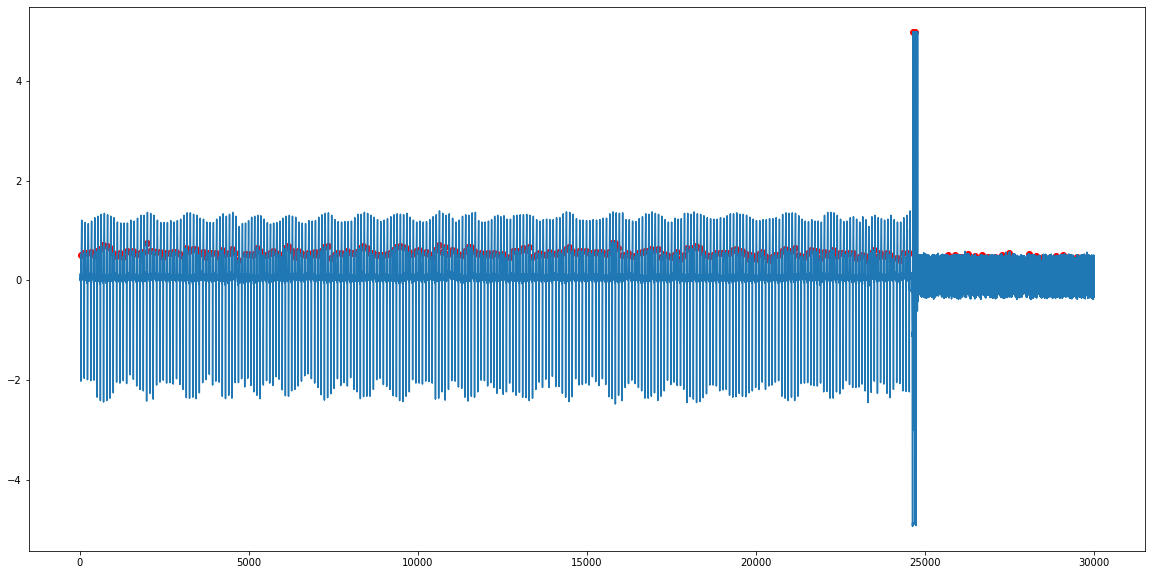

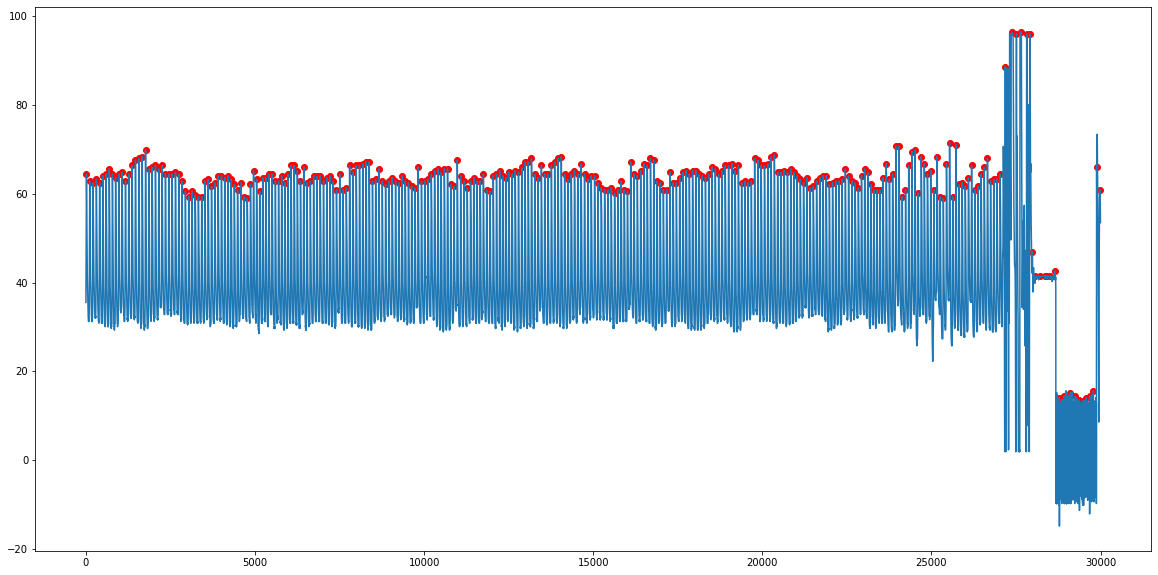

In [12]:
import matplotlib.pyplot as plt


print('PACU1_5_200618_113715.vital')
plt.figure(figsize=(20,10))
plt.plot(df_vital['ECG'])
plt.scatter(ecg_peak[0], np.array(df_vital['ECG'].tolist())[ecg_peak[0]], color='r')

plt.figure(figsize=(20,10))
plt.plot(df_vital['PPG'])
plt.scatter(ppg_peak, np.array(df_vital['PPG'].tolist())[ppg_peak], color='r')
plt.show()

In [5]:
import os, sys
import pickle
import pandas as pd
import numpy as np
import statsmodels.api as sm
from pyvital2 import arr


def smooth(y):
    #return savitzky_golay(y, window_size=2001, order=3)
    return lowess(y)


# 0.2가 제일 잘 없앴음
def lowess(y, f=0.2):
    x = np.arange(0, len(y))
    return sm.nonparametric.lowess(y, x, frac=f, it=0)[:, 1].T


# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)


### input 설정
LEN_INPUT = 20 # input 10s
LEN_PER_NRS = 300 # vital length for each NRS
OVERLAP = 5
n_aug = int((LEN_PER_NRS-LEN_INPUT)/OVERLAP) + 1 # data augmentation 개수
SRATE = 100


# vital data 저장 경로
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
ecg_path = preprocess_path + 'vital_data/ECG_250Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)


# 전처리 정보를 담을 Dataframe
column_list = ['file_path'] + [str(i+1) for i in range(n_aug)] #+ ['NRS']
df_preprocess = pd.DataFrame(columns = column_list)


error_list = []
SRATE, f_num = 100, 700
initial = f_num
interval = 300
for f_vital in f_vital_list[initial:initial+interval]:
    f_num += 1
    
    print('###Input', f_num,'/ '+str(len(f_vital_list))+': '+f_vital+'###')
    
    # vital data 불러오기    
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb')).reset_index()
    df_ecg = pickle.load(open(ecg_path+'/'+f_vital, 'rb')).reset_index()
    
    #dataframe에 새로운 행 만들기
    df_preprocess.loc[f_num-1,'file_path'] = f_vital
    
    
    ppg_cache = "../../cranberry2/Preprocessing/cache/peaks/PPG_100Hz_pacu_5min_seg/" + f_vital
    ecg_cache = "../../cranberry2/Preprocessing/cache/peaks/ECG_100Hz_pacu_5min_seg/" + f_vital    
    ecg_cache2 = "../../cranberry2/Preprocessing/cache/peaks/ECG_250Hz_pacu_5min_seg/" + f_vital
 
    # 20초 단위로 끊기
    for i in range(n_aug):
        print('  segment', i+1, end='')
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000
        
        
        df_vital_input = df_vital.loc[start_idx:end_idx-1]
        seg_ppg = df_vital_input['PPG'].tolist()
        seg_ecg = df_vital_input['ECG'].tolist()
        
        
        ### 1. 결측치 처리 ###              
        # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
        nan_ppg_list = np.isnan(seg_ppg)
        nan_ecg_list = np.isnan(seg_ecg)
        nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
        nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE
        
        # ECG, PPG 둘다 결측치인 부분
        nan_both_perc = 0
        for j in range(len(seg_ppg)):
            if nan_ppg_list[j] and  nan_ecg_list[j]:
                nan_both_perc += 1
        nan_both_perc /= (LEN_INPUT*SRATE)
            
        # segment의 결측치 비율 정보
        nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]
        
        # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
        if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-1, -1])
            print('too much missing data')
            continue
    
    
    
        ### 2. Noise 처리 ###
        # peak detection
        if os.path.exists(ppg_cache+'_{}'.format(i+1)):
            _, ppg_peak = pickle.load(open(ppg_cache+'_{}'.format(i+1), 'rb'))
            ecg_peak = pickle.load(open(ecg_cache+'_{}'.format(i+1), 'rb'))
            print('...loaded peak...', end='')
            

        else:
            try:
                min_peak, ppg_peak = arr.detect_peaks(pd.DataFrame(seg_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)
                ecg_peak = arr.detect_qrs(pd.DataFrame(seg_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)
                
            
            except Exception as e:
                print('error of', e)
                error_list.append(f_vital)
                df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-3, -3])
                continue
                
            
            if len(ppg_peak)==0:
                print('no peak')
                
                
            pickle.dump((min_peak, ppg_peak), open(ppg_cache+'_{}'.format(i+1), 'wb'))
            pickle.dump(ecg_peak, open(ecg_cache+'_{}'.format(i+1), 'wb'))
            print('...saved peak...', end='')
            
        
        # 10초 segment 내의 ppg, ecg peak idx
        #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
        idx_ppg_peak = ppg_peak
        idx_ecg_peak = ecg_peak
        
        
        # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
        # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
        if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-2, -2])
            print('too less peaks')
            continue

            
        # 20초 segment 내의 ppg, ecg peak value
        #print(len(seg_ppg), idx_ppg_peak)
        val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
        val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]
        
        # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
        bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
        bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]
        
        
        #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
        for k in range(len(bool_noise_ppg)):
            if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
                bool_noise_ppg[k] = True
        for k in range(len(bool_noise_ecg)):
            if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
                bool_noise_ecg[k] = True
                
                
        # 2.2 모양 이상한 noise
        # wave interval into same length(2s(200))
        len_wave = 2*SRATE
        norm_seg_ppg, norm_seg_ecg = [], []

        for k in range(len(bool_noise_ppg)):
            len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])
        
        for k in range(len(bool_noise_ecg)):
            len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])
          
        
        # wave interval 사이 correlation 계산 - PPG
        mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
        mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ppg)):
            if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.9:
                bool_noise_ppg[k] = True
        noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)
        
        # wave interval 사이 correlation 계산 - ECG                
        mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
        mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ecg)):
            if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.9:
                bool_noise_ecg[k] = True
        noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)
        
        # segment의 noise 비율 정보
        noise_info = [noise_ppg_perc, noise_ecg_perc]
        
        # segment를 input으로 써도 되는지
        if nan_ppg_perc < 0.05 and nan_ecg_perc < 0.05 and nan_both_perc < 0.05 and noise_ppg_perc < 0.1 and noise_ecg_perc < 0.1:
            bool_pass = True
        else:
            bool_pass = False
       
        # 이 segment의 정보를 dataframe에 저장
        df_preprocess.loc[f_num-1,str(i+1)] = (bool_pass, nan_info, noise_info)        
        print('preprocessing done...', end='')
        
        
        
        # 전처리 성공한 case에 대해 lowess filter 적용
        if bool_pass:
            print('passed...lowess filtering...', end='')
            save_path = '../../cranberry2/Preprocessing/cache/lowess_filtered/preprocess6/pacu_'+f_vital
            if os.path.exists(save_path+'_{}'.format(i+1)):
                print('already exists')
                continue
                
                
            start_idx = i*OVERLAP*250
            end_idx = (i*OVERLAP + LEN_INPUT)*250
            seg_ecg2 = df_ecg.loc[start_idx:end_idx-1]
            ecg_inp = seg_ecg2[['ECG']].fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            
            try:
                ecg_peak2 = arr.detect_qrs(ecg_inp, 250)
                
            except Exception as e:
                print('error on 250Hz peak:', e)
                
            else:
                pickle.dump(ecg_peak2, open(ecg_cache2+'_{}'.format(i+1),'wb'))
            
            
            ppg_inp = pd.DataFrame(seg_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            #ppg_inp = signal.resample(ppg_inp, 250*LEN_INPUT)
            
            
            ppg_input = ppg_inp - smooth(ppg_inp)
            ecg_input = ecg_inp - smooth(ecg_inp)
                                        
            
            pickle.dump([ppg_input, ecg_input],  open(save_path+'_{}'.format(i+1), 'wb'))
            print('done')
            
    
        else:
            print('failed')
        

    if f_num%100 == 0:
        print('dumping cache of d_preprocess -', f_num, '/ 10075')
        pickle.dump(df_preprocess, open('../DL_model/cache/preprocess6/df_preprocess_pacu_{}-{}'.format(initial, initial+interval), 'wb'))

        
print('dumping cache of d_preprocess -', f_num, '/ 10075')
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess6/df_preprocess_pacu_{}-{}'.format(initial, initial+interval), 'wb'))


###Input 701 / 10075: 9.0,5077,PACU1_1_200512_120122.vital###
  segment 1too much missing data
  segment 2too much missing data
  segment 3too much missing data
  segment 4too much missing data
  segment 5too much missing data
  segment 6too much missing data
  segment 7too much missing data
  segment 8too much missing data
  segment 9too much missing data
  segment 10too much missing data
  segment 11too much missing data
  segment 12too much missing data
  segment 13too much missing data
  segment 14too much missing data
  segment 15too much missing data
  segment 16too much missing data
  segment 17too much missing data
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess fi

  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...failed
  segment 32...saved peak...preprocessing done...failed
  segment 33...saved peak...too less peaks
  segment 34...saved peak...too less peaks
  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...failed
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...preprocessing done...failed
  segment 41...saved peak...preprocessing done...failed


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...too less peaks
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...too less peaks
  segment 24...saved peak...too less peaks
  segment 25...saved peak...too less peaks
  segment 26...saved peak...too less peaks
  segment 27...saved peak...too less peaks
  segment 28...saved peak...too less peaks
  segment 29...saved peak...too less peaks
  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...too less peaks
  segment 32...saved peak...too less peaks
  segment 33...saved peak...too less peaks
  segment 34...saved peak...too less peaks
  segment 35...saved peak...too less peaks
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...too less peaks
  segment 38...sav

  segment 46...saved peak...preprocessing done...failed
  segment 47...saved peak...preprocessing done...failed
  segment 48...saved peak...preprocessing done...failed
  segment 49...saved peak...preprocessing done...failed
  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...failed
  segment 53...saved peak...preprocessing done...failed
  segment 54...saved peak...preprocessing done...failed
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...failed
###Input 708 / 10075: 6.0,8090,PACU1_1_201019_174833.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved pea

  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...failed
  segment 53...saved peak...preprocessing done...failed
  segment 54...saved peak...preprocessing done...failed
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...failed
  segmen

  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...s

  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...s

  segment 12...saved peak...too less peaks
  segment 13...saved peak...too less peaks
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...too less peaks
  segment 19...saved peak...too less peaks
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...too less peaks
 

  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...s

  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing 

  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...s

  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preproc

  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess fil

  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...too less peaks
  segment 40...saved peak...too less peaks
  segment 41...saved peak...too less peaks
  segment 42...saved peak...preprocessing done...failed
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...preprocessing done...failed
  segment 45...saved peak...preprocessing done...failed
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing d

  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...s

  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 733 / 10075: 5.0,8571,PACU1_6_190430_145614.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing don

  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53too much missing data
  segment 54too much missing data
  segment 55too much missing data
  segment 56too much missing data
  segment 57too much missing data
###Input 735 / 10075: 7.0,6336,PACU1_9_200708_085948.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...fail

  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...failed
  segment 53...saved peak...preprocessing done...failed
  segment 54...saved peak...preprocessing done...failed
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...failed
###Input 737 / 10075: 3.0,8150,PACU1_6_201021_142848.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...pa

  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...failed
  segment 33...saved peak...preprocessing done...failed
  segment 34...saved peak...preprocessing done...failed
  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...too less peaks
  segment 38...saved peak...too less peaks
  segment 39...saved peak...too less peaks
  segment 40...saved peak...too less peaks
  segment 41...saved peak...preprocessing done...failed
  segment 42...saved peak...preprocessing done...failed
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...preprocessing done...failed
  segment 45...saved peak...too less peaks
  segment 46...saved peak...too less peaks
  segment 47...saved peak...too less peaks
  segment 48...saved peak...too less peaks
  segment 49..

  segment 40...saved peak...preprocessing done...failed
  segment 41...saved peak...preprocessing done...failed
  segment 42...saved peak...preprocessing done...failed
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...failed
  segment 53...saved peak...preprocessing done...failed
  segment 54...saved peak...prepro

  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...failed
  segment 49...saved peak...preprocessing done...failed
  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...failed
  segment 53...saved peak...preprocessing done...failed
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input

  segment 47...saved peak...preprocessing done...failed
  segment 48...saved peak...preprocessing done...failed
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...failed
###Input 746 / 10075: 3.0,6085,PACU1_2_200623_223241.vital###
  segment 1too much missing data
  segment 2too much missing data
  segment 3too much missing data
  segment 4too 

  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preproc

  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...too less peaks
  segment 29...saved peak...too less peaks
  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...failed
  segment 33...saved peak...preprocessing done...failed
  segment 34...saved peak...preprocessing done...failed
  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...failed
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...preprocessing done...failed
  segment 41...saved peak...preprocessing done...failed
  segment 42...saved peak...preprocessing done...failed
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved p

  segment 32...saved peak...preprocessing done...failed
  segment 33...saved peak...preprocessing done...failed
  segment 34...saved peak...preprocessing done...failed
  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...failed
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...preprocessing done...failed
  segment 41...saved peak...preprocessing done...failed
  segment 42...saved peak...preprocessing done...failed
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...preprocessing done...failed
  segment 45...saved peak...preprocessing done...failed
  segment 46...saved peak...preprocessing done...failed
  segment 47...saved peak...preprocessing done...failed
  segment 48...saved peak...preprocessing done...failed
  segment 49...saved peak...preprocessing done..

  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...preprocessing done...failed
  segment 41...saved peak...preprocessing done...failed
  segment 42...saved peak...preprocessing done...failed
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...preprocessing done...failed
  segment 45...saved peak...preprocessing done...failed
  segment 46...saved peak...preprocessing done...failed
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...failed
  segment 53...saved peak...preprocessing done...failed
  segment 54...saved peak...preprocessing done...failed


  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...too less peaks
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...preprocessing done...failed
  segment 41...saved peak...preprocessing done...failed
  segment 42...saved peak...preprocessing done...failed
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...preprocessing done...failed
  segment 45...saved peak...preprocessing done...failed
  segment 46...saved peak...preprocessing done...failed
  segment 47...saved peak...preprocessing done...failed
  segment 48...saved peak...too less peaks
  segment 49...saved peak...too less peaks
  segment 50...saved peak...too less peaks
  segment 51...saved peak...too less peaks
  segment 52...saved peak...too less peaks
  segment 53...saved peak...preprocessing done...failed
  segment 54too much missing data
  segment 55too much missing data
  

  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...failed
  segment 50...saved peak...preprocessing 

  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...failed
  segment 47...saved peak...preprocessing done...failed
  segment 48...saved peak...preprocessing done...failed
  segment 49...saved peak...preprocessing done...failed
  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...saved peak...preprocessing done...failed
  segment 53...saved peak...preprocessing done...failed
  segment 54...saved peak...preprocessing done...failed
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 762 / 10075: 3.0,3928,PACU1_5_200220_203135.vital###
  segment 1...saved peak

  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 764 / 10075: 3.0,2778,PACU1_3_200106_003813.vital###
  segment 1too much missing data
  segment 2too much missing data
  segment 3too much missing data
  segment 4too much missing data
  segment 5too much missing data
  segment 6too much missing data
  segment 7too much missing data
  segment 8too much missing data
  segment 9too much missing data
  segment 10too much missing data
  segment 11too much missing data
  segment 12too much miss

  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...too less peaks
  segment 17...saved peak...too less peaks
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done..

  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...saved peak...preprocessing 

  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...prepro

  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...preprocessing done...failed
  segment 32...saved peak...preprocessing done...failed
  segment 33...saved peak...preprocessing done...failed
  segment 34...saved peak...preprocessing done...failed
  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...failed
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved p

  segment 54...saved peak...preprocessing done...failed
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...failed
###Input 775 / 10075: 5.0,735,PACU1_5_190530_165947.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess fil

  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...failed
  segment 53...saved peak...preprocessing done...failed
  segment 54...saved peak...preprocessing done...failed
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...failed
###Input 777 / 10075: 4.0,3940,PACU1_10_200221_102154.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lo

  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 779 / 10075: 5.0,9027,PACU1_7_190906_142446.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing do

  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...prepr

  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowe

  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...s

  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...preprocessing done...failed
  segment 32...saved peak...preprocessing done...failed
  segment 33...saved peak...preprocessing done...failed
  segment 34...saved peak...preprocessing done...failed
  segment 35...saved peak...too less peaks
  segment 36...saved peak...too less peaks
  segment 37...saved peak...too less peaks
  segment 38...saved peak...preprocessing done...failed
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...preprocessing done...failed
  segment 41...saved peak...preprocessing done...failed
  segment 42...saved peak...preprocessing done...failed
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...pre

  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...failed
###Input 791 / 10075: 3.0,7587,PACU1_10_200922_123520.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessin

  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 793 / 10075: 6.0,9369,PACU1_2_200211_111825.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing do

  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 795 / 10075: 5.0,4228,PACU1_12_200303_162631.vital###
  segment 1too much missing data
  segment 2too much missing data
  segment 3too much missing data
  segment 4too much missing data
  segment 5too much missing data
  segment 6too much missing data
  segment 7too much missing data
  segment 8too much missing data
  segment 9too much missing data
  segment 10too much missing data
  segment 11too much missing data
  segment 12too much missing data
  segment 13too much missing data
  segment 14too much missing data
  segment 15too much missing data
  segment 16too much missing data
  segment 17too much missing data
  segment 18too much missing data
  segment 19too much missing data
  segment 20...saved peak...too less peaks
  segment 21...saved peak...preprocessing done...failed
  segme

  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...s

  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...s

  segment 47...saved peak...preprocessing done...failed
  segment 48...saved peak...preprocessing done...failed
  segment 49...saved peak...preprocessing done...failed
  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...failed
  segment 53...saved peak...preprocessing done...failed
  segment 54...saved peak...preprocessing done...failed
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...failed
###Input 802 / 10075: 4.0,9104,PACU1_1_191023_210802.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...too less peaks
  segment 3...saved peak...too less peaks
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...save

  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 804 / 10075: 3.0,4371,PACU1_3_200309_132216.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing 

  segment 54...saved peak...preprocessing done...failed
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...failed
###Input 806 / 10075: 4.0,2631,PACU1_2_191219_152733.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...p

  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved

  segment 49...saved peak...preprocessing done...failed
  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...failed
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 810 / 10075: 7.0,366,PACU1_10_190510_104505.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...pr

  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 812 / 10075: 3.0,9961,PACU1_10_200803_165836.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess 

  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 814 / 10075: 5.0,5390,PACU1_2_200526_234216.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preproce

  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 816 / 1

  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing do

  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...s

  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...too less peaks
  segment 24...saved peak...too less peaks
  segment 25...saved peak...too less peaks
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...preprocessing done...failed
  segment 32...saved peak...preprocessing done...failed
  segment 33...saved peak...preprocessing done...failed
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preproc

  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...s

  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...failed
  segment 53...saved peak...too less peaks
  segment 54...saved peak...too less peaks
  segment 55...saved peak...too less peaks
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...failed
###Input 827 / 10075: 5.0,7978,PACU1_4_201013_145424.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...prepro

  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak..

  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...failed
  segmen

  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segmen

  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...save

  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...sav

  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...preprocessing done...failed
  segment 32...saved peak...preprocessing done...failed
  segment 33...saved peak...preprocessing done...failed
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved p

  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segmen

  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...pr

  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment

  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27

  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segment 26

  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...preprocessing done...failed
  segment 32...saved peak...preprocessing done...failed
  segment 33...saved peak...preprocessing done...failed
  se

  segment 52...saved peak...too less peaks
  segment 53...saved peak...preprocessing done...failed
  segment 54...saved peak...preprocessing done...failed
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...failed
###Input 855 / 10075: 8.0,3389,PACU1_9_200131_100313.vital###
  segment 1too much missing data
  segment 2too much missing data
  segment 3too much missing data
  segment 4too much missing data
  segment 5too much missing data
  segment 6too much missing data
  segment 7too much missing data
  segment 8too much missing data
  segment 9too much missing data
  segment 10too much missing data
  segment 11too much missing data
  segment 12too much missing data
  segment 13too much missing data
  segment 14too much missing data
  segment 15too much missing data
  segment 16too much missing data
  segment 17too much missing data
  segment 18too much missing data
  segment 19

  segment 47...saved peak...preprocessing done...failed
  segment 48...saved peak...preprocessing done...failed
  segment 49...saved peak...preprocessing done...failed
  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...failed
  segment 54...saved peak...preprocessing done...failed
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 858 / 10075: 6.0,5537,PACU1_2_200602_022022.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...fa

  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved

  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 862 / 10075: 6.0,9866,PACU1_2_200701_175115.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessin

  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 864 / 10075: 7.0,5136,PACU1_5_200514_113005.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preproces

  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...s

  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...s

  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...s

  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocess

  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...s

  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...s

  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done..

  segment 53...saved peak...preprocessing done...failed
  segment 54...saved peak...preprocessing done...failed
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...too less peaks
  segment 57...saved peak...too less peaks
###Input 880 / 10075: 5.0,7661,PACU1_9_200924_115216.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...too less peaks
  segment 7...saved peak...too less peaks
  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...pa

  segment 57...saved peak...preprocessing done...failed
###Input 882 / 10075: 8.0,3375,PACU1_5_200130_192754.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...pa

  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess fil

  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocess

  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess fi

  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...preprocessing done..

  segment 40...saved peak...too less peaks
  segment 41...saved peak...too less peaks
  segment 42...saved peak...preprocessing done...failed
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...preprocessing done...failed
  segment 45...saved peak...preprocessing done...failed
  segment 46...saved peak...too less peaks
  segment 47...saved peak...too less peaks
  segment 48...saved peak...too less peaks
  segment 49...saved peak...too less peaks
  segment 50...saved peak...too less peaks
  segment 51...saved peak...too less peaks
  segment 52...saved peak...too less peaks
  segment 53...saved peak...too less peaks
  segment 54...saved peak...too less peaks
  segment 55...saved peak...too less peaks
  segment 56...saved peak...too less peaks
  segment 57...saved peak...too less peaks
###Input 893 / 10075: 8.0,3544,PACU1_5_200206_175530.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...prep

  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 895 / 1

  segment 44...saved peak...preprocessing done...failed
  segment 45...saved peak...preprocessing done...failed
  segment 46...saved peak...preprocessing done...failed
  segment 47...saved peak...preprocessing done...failed
  segment 48...saved peak...preprocessing done...failed
  segment 49...saved peak...preprocessing done...failed
  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...too less peaks
  segment 52...saved peak...too less peaks
  segment 53...saved peak...too less peaks
  segment 54...saved peak...too less peaks
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...too less peaks
###Input 897 / 10075: 5.0,5568,PACU1_11_200602_165206.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...passe

  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...fai

###Input 901 / 10075: 6.0,1673,PACU1_2_190820_183435.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...too less peaks
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...too less peaks
  segment 7...saved peak...too less peaks
  segment 8...saved peak...too less peaks
  segment 9...saved peak...too less peaks
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...too less peaks
  segment 12...saved peak...too less peaks
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...too less peaks
  segment 17...saved peak...too less peaks
  segment 18...saved peak...too less peaks
  segment 19...saved peak...too less peaks
  segment 20...saved peak.

  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...preprocessing done...failed
  segment 45...saved peak...preprocessing done...failed
  segment 46...saved peak...preprocessing done...failed
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocess

  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...failed
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...preprocessing done...failed
  segment 41...saved peak...preprocessing done...failed
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segmen

  segment 52too much missing data
  segment 53too much missing data
  segment 54too much missing data
  segment 55too much missing data
  segment 56too much missing data
  segment 57too much missing data
###Input 909 / 10075: 5.0,6716,PACU1_1_200727_121151.vital###
  segment 1too much missing data
  segment 2too much missing data
  segment 3too much missing data
  segment 4too much missing data
  segment 5too much missing data
  segment 6too much missing data
  segment 7too much missing data
  segment 8too much missing data
  segment 9too much missing data
  segment 10too much missing data
  segment 11too much missing data
  segment 12too much missing data
  segment 13too much missing data
  segment 14too much missing data
  segment 15too much missing data
  segment 16too much missing data
  segment 17too much missing data
  segment 18too much missing data
  segment 19too much missing data
  segment 20too much missing data
  segment 21too much missing data
  segment 22too much missing 

  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...s

  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...pas

  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...failed
  segment 33...saved peak...preprocessing done...failed
  segment 34too much missing data
  segment 35too much missing data
  segment 36too much missing data
  segment 37too much missing data
  segment 38too much missing data
  segment 39too much missing data
  segment 40too much missing data
  segment 41too much missing data
  segment 42too much missing data
  segment 43too much missing data
  segment 44too much missing data
  segment 45too much missing data
  segment 46too much missing data
  segment 47too much missing data
  segment 48too much missing data
  segment 49too much missing data
  segment 50too 

  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...s

  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...failed
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...preprocessing done...failed
  segment 41...saved peak...preprocessing done...failed
  segment 42...saved peak...preprocessing done...failed
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...preprocessing done...failed
  segment 45...saved peak...preprocessing done...failed
  segment 46...saved peak...preprocessing done...failed
  segment 47...saved peak...preprocessing done...failed
  segment 48...saved peak...preprocessing done...failed
  segment 49...saved peak...preprocessing done...failed
  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...failed
  segment 53...saved peak...preprocessing done..

  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 922 / 10075: 2.0,5083,PACU1_3_200512_142935.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing don

  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 924 / 10075: 6.0,5118,PACU1_1_200513_172057.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preproc

  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...passed...lowess filtering...done
  segment 51...saved peak...preprocessing done...passed...lowess filtering...done
  segment 52...saved peak...preprocessing done...passed...lowess filtering...done
  segment 53...saved peak...preprocessing done...passed...lowess filtering...done
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 926 / 10075: 3.0,6097,PACU1_6_200624_113822.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocess

  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...saved peak...preprocessing done...passed...lowess filtering...done
  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...too less peaks
  segment 52...saved peak...too less peaks
  segment 53...saved peak...preprocessing done...failed
  segment 54...saved peak...preprocessing done...failed
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...failed
###Input 928 / 10075: 2.0,871,PACU1_6_190612_154609.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...p

  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess filtering...done
  segment 49...s

  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segme

  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...s

  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocess

  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...too less peaks
  segment 24...saved peak...too less peaks
  segment 25...saved peak...too less peaks
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...too less peaks
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...too less peaks
  segment 31...saved peak...too less peaks
  segment 32...saved peak...too less peaks
  segment 33...saved peak...too less peaks
  segment 34...saved peak...too less peaks
  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak..

  segment 42...saved peak...preprocessing done...failed
  segment 43...saved peak...too less peaks
  segment 44...saved peak...preprocessing done...failed
  segment 45...saved peak...preprocessing done...failed
  segment 46...saved peak...preprocessing done...failed
  segment 47...saved peak...preprocessing done...failed
  segment 48...saved peak...preprocessing done...failed
  segment 49...saved peak...preprocessing done...failed
  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...failed
  segment 53...saved peak...preprocessing done...failed
  segment 54...saved peak...preprocessing done...failed
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...too less peaks
  segment 57...saved peak...preprocessing done...failed
###Input 941 / 10075: 2.0,6891,PACU1_10_200805_171050.vital###
  segment 1...saved peak...preprocessing done...passed...lowess fil

  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...s

  segment 26...saved peak...too less peaks
  segment 27...saved peak...too less peaks
  segment 28...saved peak...too less peaks
  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...preprocessing done...failed
  segment 32...saved peak...preprocessing done...failed
  segment 33...saved peak...preprocessing done...failed
  segment 34...saved peak...preprocessing done...failed
  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...preprocessing done...failed
  segment 41...saved peak...preprocessing done...failed
  segment 42...saved peak...preprocessing done...failed
  segment 43...saved peak...preprocessing done...failed
  seg

  segment 34...saved peak...preprocessing done...failed
  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...failed
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segmen

  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16.

  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...save

  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 953 / 10075: 7.0,728,PACU1_4_190530_155255.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...too less peaks
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...too less pe

  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...s

  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...preprocessing done...failed
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...failed
  segment 44...saved peak...preprocessing done...passed...lowess filtering...done
  segment 45...saved peak...preprocessing done...passed...lowess filtering...done
  segment 46...saved peak...preprocessing done...passed...lowess filtering...done
  segment 47...saved peak...preprocessing done...passed...lowess filtering...done
  segment 48...saved peak...preprocessing done...passed...lowess

  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...failed
  segment 53...saved peak...too less peaks
  segment 54...saved peak...too less peaks
  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...preprocessing done...failed
###Input 960 / 10075: 3.0,3720,PACU1_5_200214_094414.vital###
  segment 1too much missing data
  segment 2too much missing data
  segment 3too much missing data
  segment 4too much missing data
  segment 5too much missing data
  segment 6too much missing data
  segment 7too much missing data
  segment 8too much missing data
  segment 9too much missing data
  segment 10too much missing data
  segment 11too much missing data
  segment 12too much missing data
  segment 13too much missing data
  segment 14too much missing data
  segment 15too much missing data
  segment 16too

  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...passed...lowess filtering...done
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37...saved peak...preprocessing done...passed...lowess filtering...done
  segment 38...saved peak...preprocessing done...passed...lowess filtering...done
  segment 39...saved peak...preprocessing done...passed...lowess filtering...done
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...s

  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...failed
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...passed...lowess filtering...done
  segment 42...saved peak...preprocessing done...passed...lowess filtering...done
  segment 43...saved peak...preprocessing done...passed...lowess filtering...done
  segment 44...saved peak...preprocessing done...failed
  segment 45...saved peak...preprocessing done...failed
  segment 46...saved peak...too less peaks
  segment 47...saved peak...too less peaks
  segment 48...saved peak...too less peaks
  segment 49...saved peak...preprocessing done...failed
  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...too less peaks
  segment 52...saved peak...too less peaks
  segment

  segment 55...saved peak...preprocessing done...failed
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 967 / 10075: 2.0,979,PACU1_1_190705_092334.vital###
  segment 1...saved peak...too less peaks
  segment 2...saved peak...too less peaks
  segment 3...saved peak...too less peaks
  segment 4...saved peak...too less peaks
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...pr

  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 969 / 10075: 8.0,3150,PACU1_8_200120_160926.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filter

  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 971 / 10075: 6.0,9496,PACU1_8_200310_163920.vital###
  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...failed
  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preproces

  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filterin

  segment 56...saved peak...preprocessing done...passed...lowess filtering...done
  segment 57...saved peak...preprocessing done...passed...lowess filtering...done
###Input 975 / 10075: 3.0,5879,PACU1_2_200615_102709.vital###
  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...failed
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preproces

  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess fil

  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...too less peaks
  segment 12...saved peak...too less peaks
  segment 13...saved peak...too less peaks
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...too less peaks
  segment 16...saved peak...too less peaks
  segment 17...saved peak...too less peaks
  segment 18...saved peak...too less peaks
  segment 19...saved peak...too less peaks
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessin

  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...passed.

  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...failed
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...failed
  segment 34...saved peak...preprocessing done...failed
  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...prepro

  segment 1...saved peak...preprocessing done...passed...lowess filtering...done
  segment 2...saved peak...preprocessing done...passed...lowess filtering...done
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak

  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...failed
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved 

  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved peak...preprocessing done...passed...lowess filtering...done
  segment 17...saved peak...preprocessing done...passed...lowess filtering...done
  segment 18...saved peak...preprocessing done...passed...lowess filtering...done
  segment 19...saved peak...preprocessing done...passed...lowess filtering...done
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23

  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...preprocessing done...failed
  segment 17...saved peak...preprocessing done...failed
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...preprocessing done...failed
  segment 23...saved peak...preprocessing done...failed
  segment 24...saved peak...preprocessing done...failed
  segment 25...saved peak...preprocessing done...failed


  segment 25...saved peak...preprocessing done...failed
  segment 26...saved peak...preprocessing done...failed
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...failed
  segment 29...saved peak...preprocessing done...failed
  segment 30...saved peak...preprocessing done...failed
  segment 31...saved peak...preprocessing done...failed
  segment 32...saved peak...preprocessing done...failed
  segment 33...saved peak...preprocessing done...failed
  segment 34...saved peak...preprocessing done...failed
  segment 35...saved peak...preprocessing done...failed
  segment 36...saved peak...preprocessing done...failed
  segment 37...saved peak...preprocessing done...failed
  segment 38...saved peak...preprocessing done...failed
  segment 39...saved peak...preprocessing done...failed
  segment 40...saved peak...preprocessing done...passed...lowess filtering...done
  segment 41...saved peak...preprocessing done...pas

  segment 20...saved peak...preprocessing done...passed...lowess filtering...done
  segment 21...saved peak...preprocessing done...passed...lowess filtering...done
  segment 22...saved peak...preprocessing done...passed...lowess filtering...done
  segment 23...saved peak...preprocessing done...passed...lowess filtering...done
  segment 24...saved peak...preprocessing done...passed...lowess filtering...done
  segment 25...saved peak...preprocessing done...passed...lowess filtering...done
  segment 26...saved peak...preprocessing done...passed...lowess filtering...done
  segment 27...saved peak...preprocessing done...passed...lowess filtering...done
  segment 28...saved peak...preprocessing done...passed...lowess filtering...done
  segment 29...saved peak...preprocessing done...passed...lowess filtering...done
  segment 30...saved peak...preprocessing done...passed...lowess filtering...done
  segment 31...saved peak...preprocessing done...passed...lowess filtering...done
  segment 32...s

  segment 32...saved peak...preprocessing done...passed...lowess filtering...done
  segment 33...saved peak...preprocessing done...passed...lowess filtering...done
  segment 34...saved peak...preprocessing done...failed
  segment 35...saved peak...preprocessing done...passed...lowess filtering...done
  segment 36...saved peak...preprocessing done...passed...lowess filtering...done
  segment 37too much missing data
  segment 38too much missing data
  segment 39too much missing data
  segment 40too much missing data
  segment 41too much missing data
  segment 42too much missing data
  segment 43too much missing data
  segment 44too much missing data
  segment 45too much missing data
  segment 46too much missing data
  segment 47too much missing data
  segment 48too much missing data
  segment 49too much missing data
  segment 50too much missing data
  segment 51too much missing data
  segment 52too much missing data
  segment 53too much missing data
  segment 54too much missing data
  se

  segment 45...saved peak...preprocessing done...failed
  segment 46...saved peak...preprocessing done...failed
  segment 47...saved peak...preprocessing done...failed
  segment 48...saved peak...preprocessing done...failed
  segment 49...saved peak...preprocessing done...failed
  segment 50...saved peak...preprocessing done...failed
  segment 51...saved peak...preprocessing done...failed
  segment 52...saved peak...preprocessing done...failed
  segment 53...saved peak...preprocessing done...failed
  segment 54...saved peak...preprocessing done...passed...lowess filtering...done
  segment 55...saved peak...preprocessing done...passed...lowess filtering...done
  segment 56...saved peak...preprocessing done...failed
  segment 57...saved peak...too less peaks
dumping cache of d_preprocess - 1000 / 10075
dumping cache of d_preprocess - 1000 / 10075
